<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;"> Introduction</p>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    
<b>Objective</b><br>
    
    
We are tasked to cluster them on the basis of their job profile, company, and other features.
    We are focused on profiling the best companies and job positions to work.
<br>   
    
<b>About the Dataset</b>   <br>
We are provided with the information for a segment of learners by Scaler, an online tech-versity. 
    <br>
    Working as a data scientist with the analytics vertical of Scaler, we got this dataset from the Scaler database.<br><br>
      The dataset contains following features:
    <ul>
     <li> ‘Unnamed 0’- Index of the dataset
 <li>   Email_hash- Anonymised Personal Identifiable Information (PII)
 <li>   Company- Current employer of the learner
 <li>   orgyear- Employment start date
 <li>   CTC- Current CTC
 <li>   Job_position- Job profile in the company
 <li>   CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

</ul><br>
There are 206923 data points and 8 features.
<br><br>
    
<b>Concept Used :</b><br>
<ul>
    <li> Manual Clustering
    <li> Unsupervised Clustering - K- means, Hierarchical Clustering
</ul>

</div>  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import re
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#Reading csv data
data = pd.read_csv('Scaler_Kmeans.csv')

In [4]:
print("Dimensions of dataset ",data.shape)

data.head()

Dimensions of dataset  (206923, 8)


,Unnamed: 0,email_hash,company,normalized_company_name,orgyear,ctc,job_position,ctc_updated_year
0,0,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Deloitte India,Deloitte,2016.0,1100000,Other,2020.0
1,1,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,Reliance Infocomm Limited,Reliance Jio Infocomm Limited,2018.0,449999,FullStack Engineer,2019.0
2,2,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Synctactic AI,NaN,2015.0,2000000,Backend Engineer,2020.0
3,3,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Tokopedia,Tokopedia,2017.0,700000,Backend Engineer,2019.0
4,4,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,RIFT Group,NaN,2017.0,1400000,FullStack Engineer,2019.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206923 entries, 0 to 206922
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               206923 non-null  int64  
 1   email_hash               206923 non-null  object 
 2   company                  205215 non-null  object 
 3   normalized_company_name  121425 non-null  object 
 4   orgyear                  206837 non-null  float64
 5   ctc                      206923 non-null  int64  
 6   job_position             153342 non-null  object 
 7   ctc_updated_year         206923 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 12.6+ MB


<b> Checking for Null Values in dataset</b>

In [6]:
data.isna().sum()

Unnamed: 0                     0
email_hash                     0
company                     1708
normalized_company_name    85498
orgyear                       86
ctc                            0
job_position               53581
ctc_updated_year               0
dtype: int64

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Data contains null values in 4 columns [company, normalized_company_name, orgyear, job_position].
    </p>
    </div>

<b> Checking for Duplicate Rows in dataset</b>

In [7]:
len(data[data.duplicated()])


0

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Data doesn't contain any duplicate rows.
    </p>
    </div>

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;"> Data Preprocessing</p>
</div>    

<b>Checking duplicated PII ids in column email_hash</b>

In [8]:
data['email_hash'].value_counts().head(10)

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
Name: email_hash, dtype: int64

In [9]:
display(data[data['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(data[data['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,Unnamed: 0,email_hash,company,normalized_company_name,orgyear,ctc,job_position,ctc_updated_year
24129,24129,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Sify Technologies Limited.,Sify Technologies,2018.0,720000,NaN,2020.0
46038,46038,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Sify Technologies Limited.,Sify Technologies,2018.0,720000,Support Engineer,2020.0
72415,72415,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Sify Technologies Limited.,Sify Technologies,2018.0,720000,Other,2020.0
103145,103145,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Sify Technologies Limited.,Sify Technologies,2018.0,720000,FullStack Engineer,2020.0
118076,118076,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Sify Technologies Limited.,Sify Technologies,2018.0,720000,Data Analyst,2020.0
121825,121825,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Sify Technologies Limited.,Sify Technologies,2018.0,660000,Other,2019.0
124840,124840,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Sify Technologies Limited.,Sify Technologies,2018.0,660000,Support Engineer,2019.0
145021,145021,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Sify Technologies Limited.,Sify Technologies,2018.0,660000,FullStack Engineer,2019.0
153402,153402,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Sify Technologies Limited.,Sify Technologies,2018.0,660000,Devops Engineer,2019.0
160472,160472,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Sify Technologies Limited.,Sify Technologies,2018.0,660000,NaN,2019.0


,Unnamed: 0,email_hash,company,normalized_company_name,orgyear,ctc,job_position,ctc_updated_year
9859,9859,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,Qualcomm,Qualcomm,2017.0,2400000,QA Engineer,2020.0
10006,10006,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,Qualcomm,Qualcomm,2017.0,2400000,Devops Engineer,2020.0
10587,10587,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,Qualcomm,Qualcomm,2017.0,2400000,Backend Engineer,2020.0
12793,12793,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,Qualcomm,Qualcomm,2017.0,2400000,Other,2020.0
20729,20729,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,Qualcomm,Qualcomm,2017.0,2400000,SDET,2020.0
138731,138731,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,Qualcomm,Qualcomm,2017.0,2000000,SDET,2020.0
159887,159887,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,Qualcomm,Qualcomm,2017.0,2000000,Devops Engineer,2020.0
166040,166040,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,Qualcomm,Qualcomm,2017.0,2000000,Other,2020.0
179593,179593,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,Qualcomm,Qualcomm,2017.0,2000000,Backend Engineer,2020.0


<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Apparently for single Anonymised Personal Identifiable Information (PII) id there exists multiple rows with same joining dates and company but different job positions, this couldn't be possible.<br><bbr>
    We will take the first row in case of duplicated PII ids.
    </p>
    </div>

In [10]:
data = data.groupby('email_hash').first().reset_index()

<b>Creating null value indicator columns (Feature Engineering)</b>

In [11]:
for i in ['orgyear','ctc_updated_year','normalized_company_name','company','job_position']:
    data[i+'_na'] = data[i].isna()

<b>Cleaning text columns</b>

In [12]:
text_cols = ['normalized_company_name','company']
for i in text_cols:
    data[i] = data[i].fillna('Not Available').apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x).title()))

<b>Creating new columns (Feature Engineering)</b>

In [13]:
data['YoE'] = data['ctc_updated_year'] - data['orgyear']

<b>Frequency mean encoding</b>

In [14]:
feat = 'company'
data[feat] = data[feat].fillna('na')
enc_nom = (data.groupby(feat).size()) / len(data)
data[feat+'_encode'] = data[feat].apply(lambda x : enc_nom[x])

feat = 'job_position'
data[feat] = data[feat].fillna('na')
enc_nom = (data.groupby(feat).size()) / len(data)*10000
data[feat+'_encode'] = data[feat].apply(lambda x : enc_nom[x])


<b>Reemoving Outliers from Orgyear column</b>

In [15]:
sorted(data['orgyear'].fillna(0).astype(int).unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900,
 1970,
 1971,
 1972,
 1973,
 1976,
 1977,
 1979,
 1981,
 1982,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165]

Removing future years, as this case is impossible to happen, also removing single digit years.

In [16]:
data = data[~data['orgyear'].isin([0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900, 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165])]

In [17]:
data = data[~(data['YoE']<0)]

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">EDA</p>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:125%;padding: 10px;"><b>Univariate Analysis</b></p>
    </div>

<b>Plotting Categorical Features</b>

In [18]:
categroical_columns = [ 'normalized_company_name','company','job_position','orgyear','ctc_updated_year']

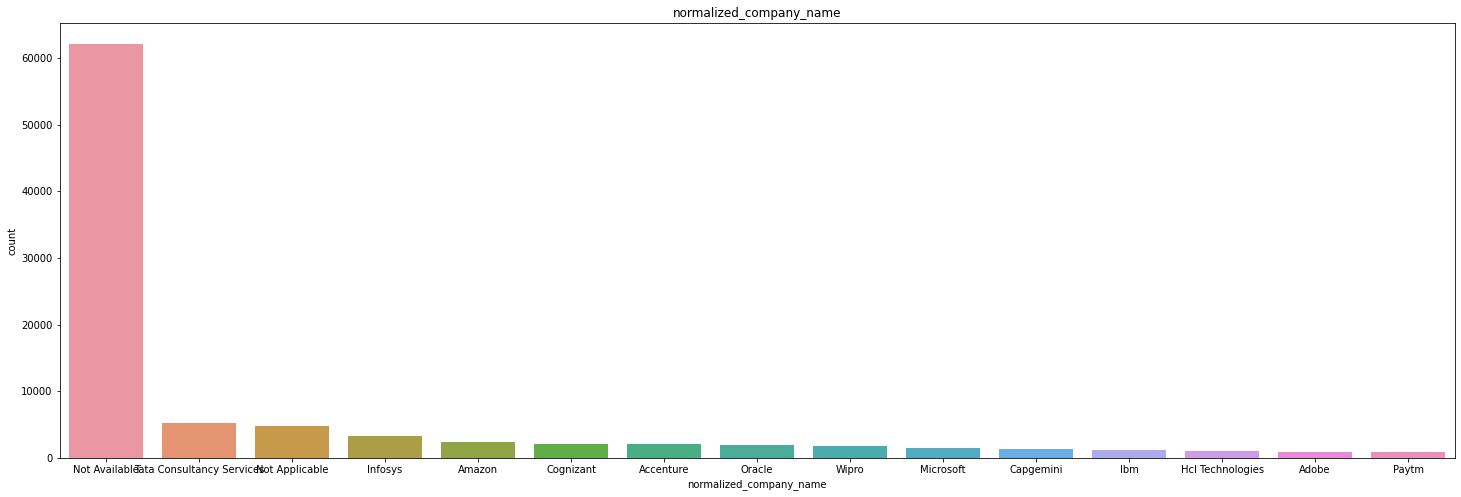

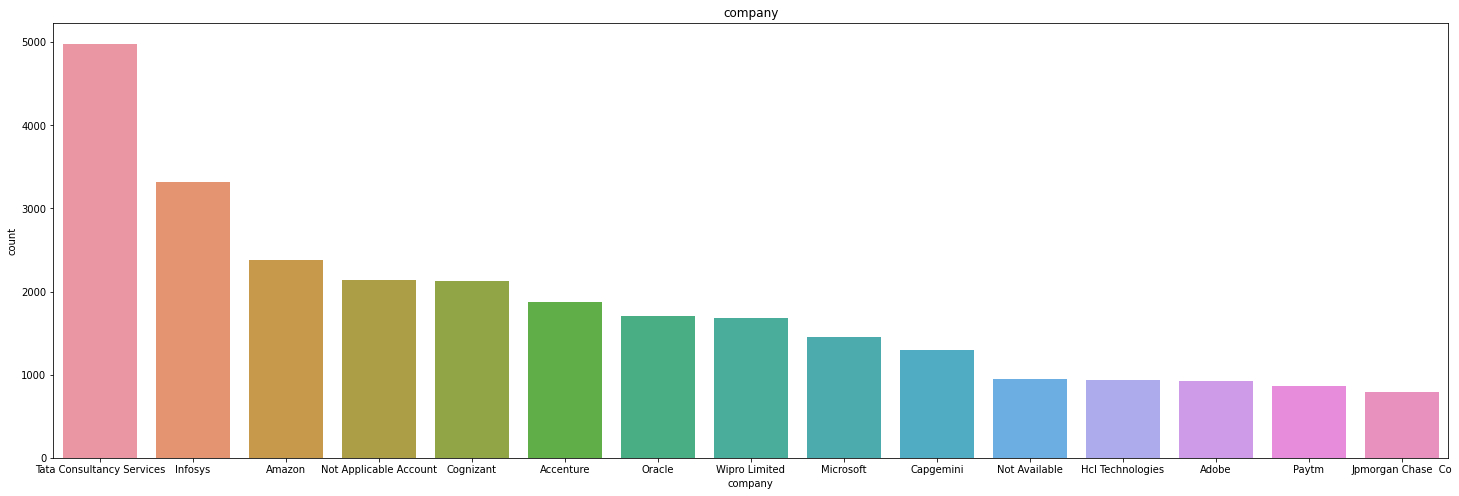

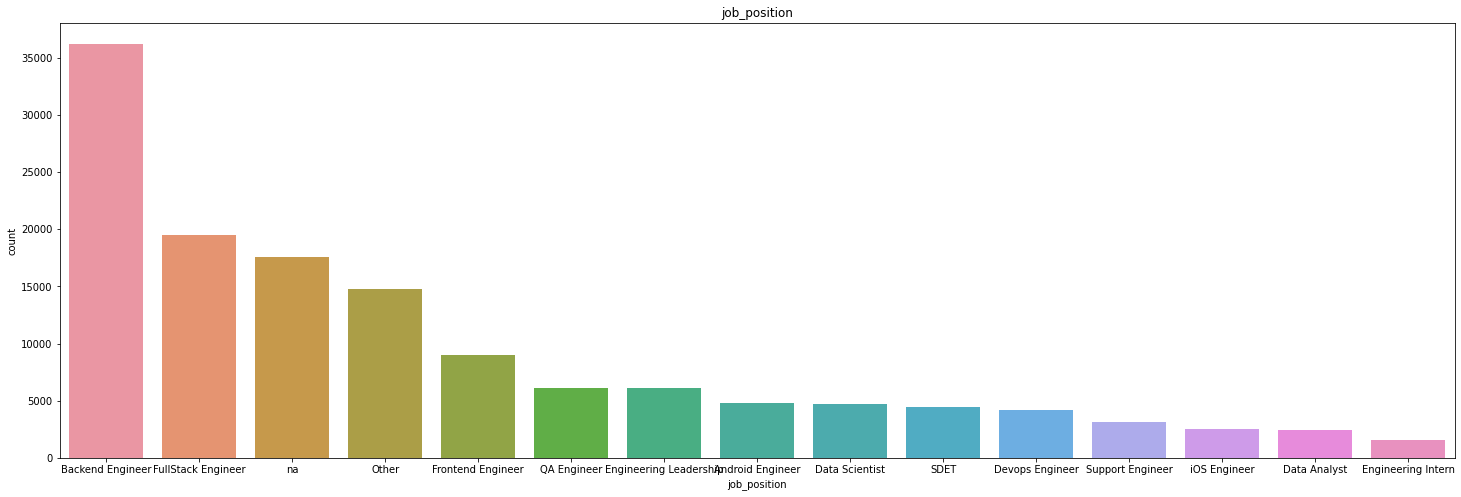

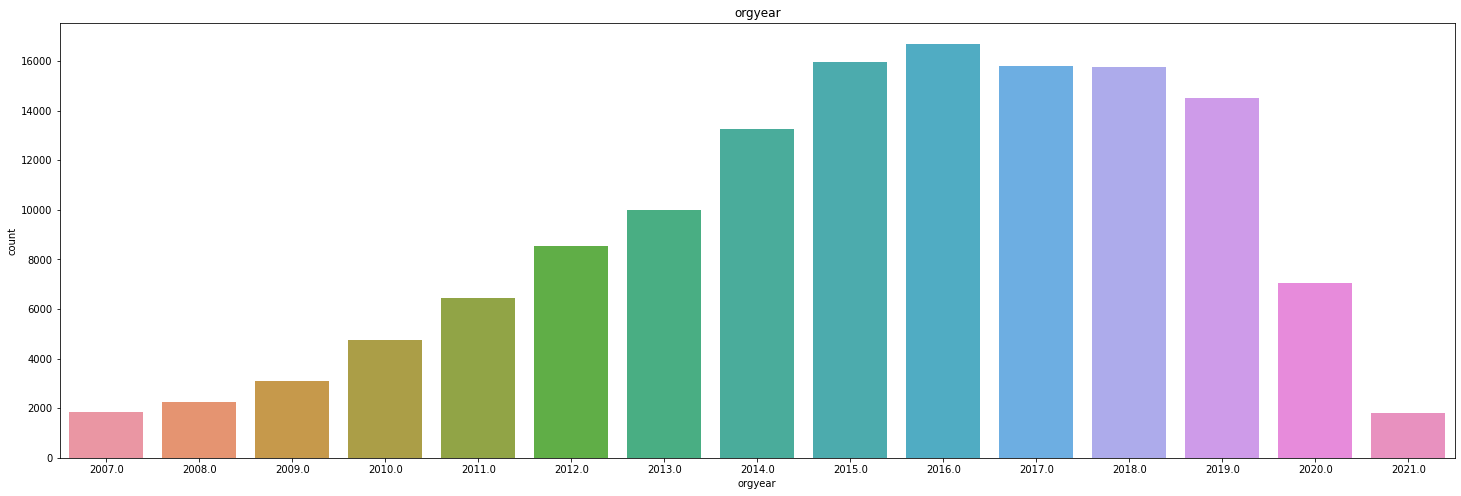

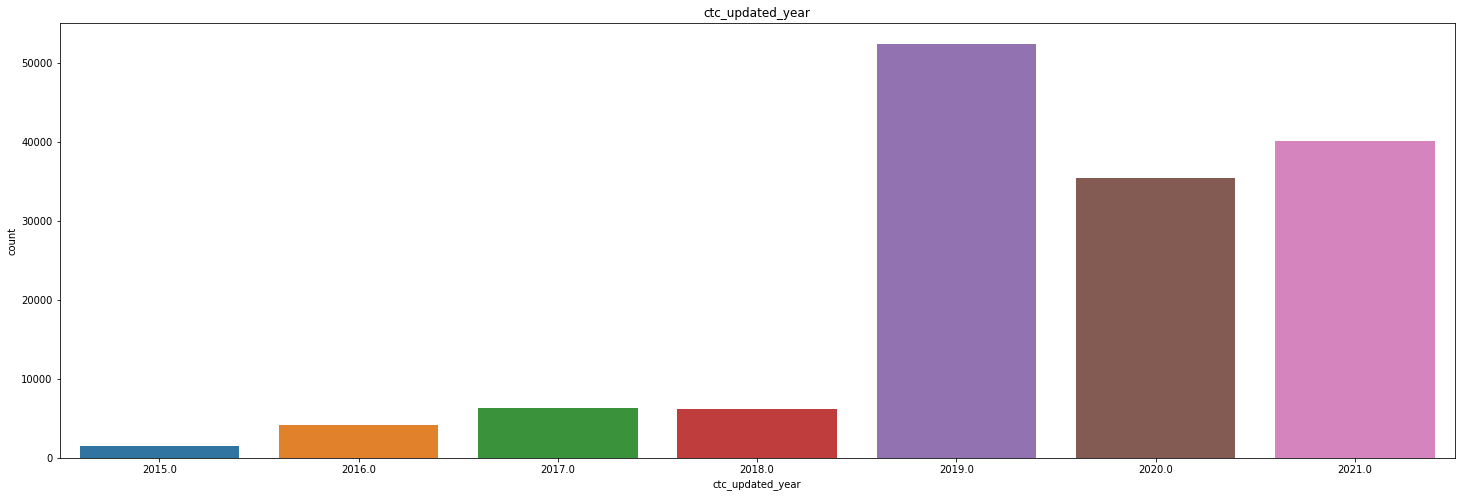

In [19]:
for i in categroical_columns:
    tmp = data.copy()
    tmp['count'] = 1
    tmp = tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)
    plt.figure(figsize=(25,8))
    sns.barplot(data=tmp,y='count',x=i).set(title=i)
    
    plt.show()
    

<b>Plotting Continuous Features</b>

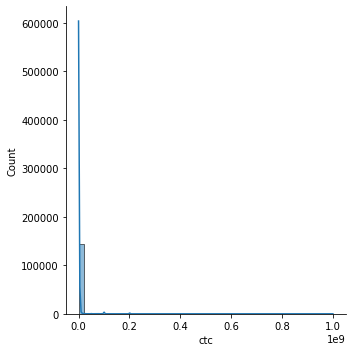

In [20]:
sns.displot(data['ctc'],kde=True,bins=50)
plt.show()

The plot seems to be having large range of values, let's try to scale column for visualizing.

C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


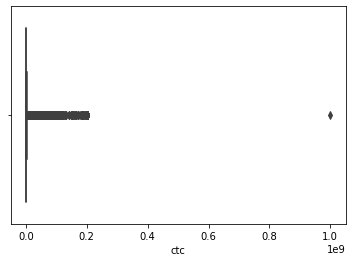

In [21]:
v = data['ctc']
#v = (v-v.mean())/v.std()
sns.boxplot(v)
plt.show()

In [22]:
data.sort_values(['ctc']).iloc[1000:1020,:]

,email_hash,Unnamed: 0,company,normalized_company_name,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,normalized_company_name_na,company_na,job_position_na,YoE,company_encode,job_position_encode
40428,439134c4b243fe33a240265f94d0c9d6e120f31cb6e2cc...,98842,Elinext,Not Available,2019.0,20000,QA Engineer,2019.0,False,False,True,False,False,0.0,0.000007,401.973371
30954,3394eeca520d9029ce6bd56e83faa5d4d82c396f453e2a...,97003,Blabber,Not Available,2011.0,20000,Android Engineer,2019.0,False,False,True,False,False,8.0,0.000007,317.968236
78889,83d1ece927b7d7e944454483a4a8a3b08a18ed846890ee...,88544,Simon Fraser University,Not Available,2016.0,20000,Other,2017.0,False,False,True,False,False,1.0,0.000026,1026.830810
90663,975e224e718de0d75c2d33d2bf24e75c4b7559664763b1...,125784,Covalense Technologies,Not Available,2016.0,20000,Backend Engineer,2019.0,False,False,True,False,False,3.0,0.000020,2431.717315
74910,7d43b749f1651cba0a16743d6235f5f32a9a58837ee081...,24380,Sap,Sap,2008.0,20000,QA Engineer,2019.0,False,False,False,False,False,11.0,0.004112,401.973371
38801,40bf699c6ab3273acfdda2c7922b30dbc5f8cedea903f4...,93058,None,Not Applicable,2008.0,20000,FullStack Engineer,2019.0,False,False,False,False,False,11.0,0.003115,1319.056588
25247,29e7d12a6225aeff7b5d92947f949e6646ec58111e5a5a...,4290,Areena Multimedia,Not Available,2001.0,20000,Other,2021.0,False,False,True,False,False,20.0,0.000007,1026.830810
117820,c4a7229bb63eade33516411b68d8501420e15987d116eb...,135189,Pharmeasy,Pharmeasy,2012.0,20000,Backend Engineer,2019.0,False,False,False,False,False,7.0,0.000398,2431.717315
73669,7b3b93e56fd67d3ddfeb41f68a88a61d01c397aab9bbe1...,151028,Marisoft,Not Available,2017.0,20000,na,2019.0,False,False,True,False,True,2.0,0.000007,1318.013855
71300,774a4a75a15f53e19bbf4ef85a5c6dc3da689e4291f773...,77722,Lifestyle International Pvt Ltd,Not Available,2010.0,20000,Other,2016.0,False,False,True,False,False,6.0,0.000007,1026.830810


In [23]:
data = data[data['ctc'] >702475]

<b> Outlier Removal using IQR</b> 

In [24]:
dftmp = data.copy()
print(dftmp.shape)
cols = ['ctc'] # one or more

Q1 = dftmp[cols].quantile(0.25)
Q3 = dftmp[cols].quantile(0.75)
IQR = Q3 - Q1

dftmp = dftmp[~((dftmp[cols] < (Q1 - 1.5 * IQR)) |(dftmp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dftmp.shape)

(92558, 16)
(86464, 16)


In [25]:
#dftmp = dftmp[dftmp['ctc']>300000]

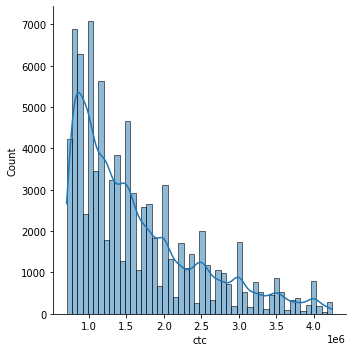

In [26]:
v = dftmp['ctc']
sns.displot(v,kde=True,bins=50)
plt.show()

C:\Users\PARTHA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


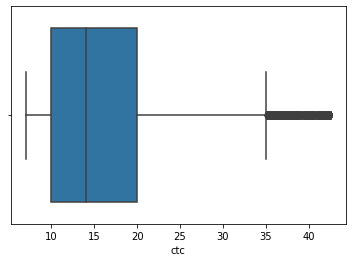

In [27]:
v = dftmp['ctc']/100000
#v = (v-v.mean())/v.std()
sns.boxplot(v)
plt.show()

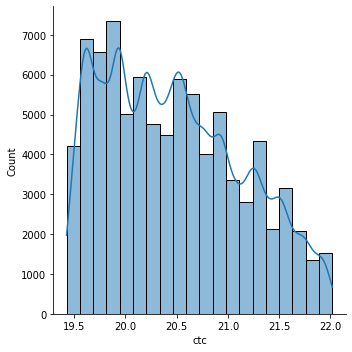

In [28]:
v = np.log2(dftmp['ctc'])
sns.displot(v,kde=True,bins=20)
plt.show()

In [29]:
dateda = dftmp.copy()

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:125%;padding: 10px;"><b>Multivariate Analysis</b></p>
    </div>

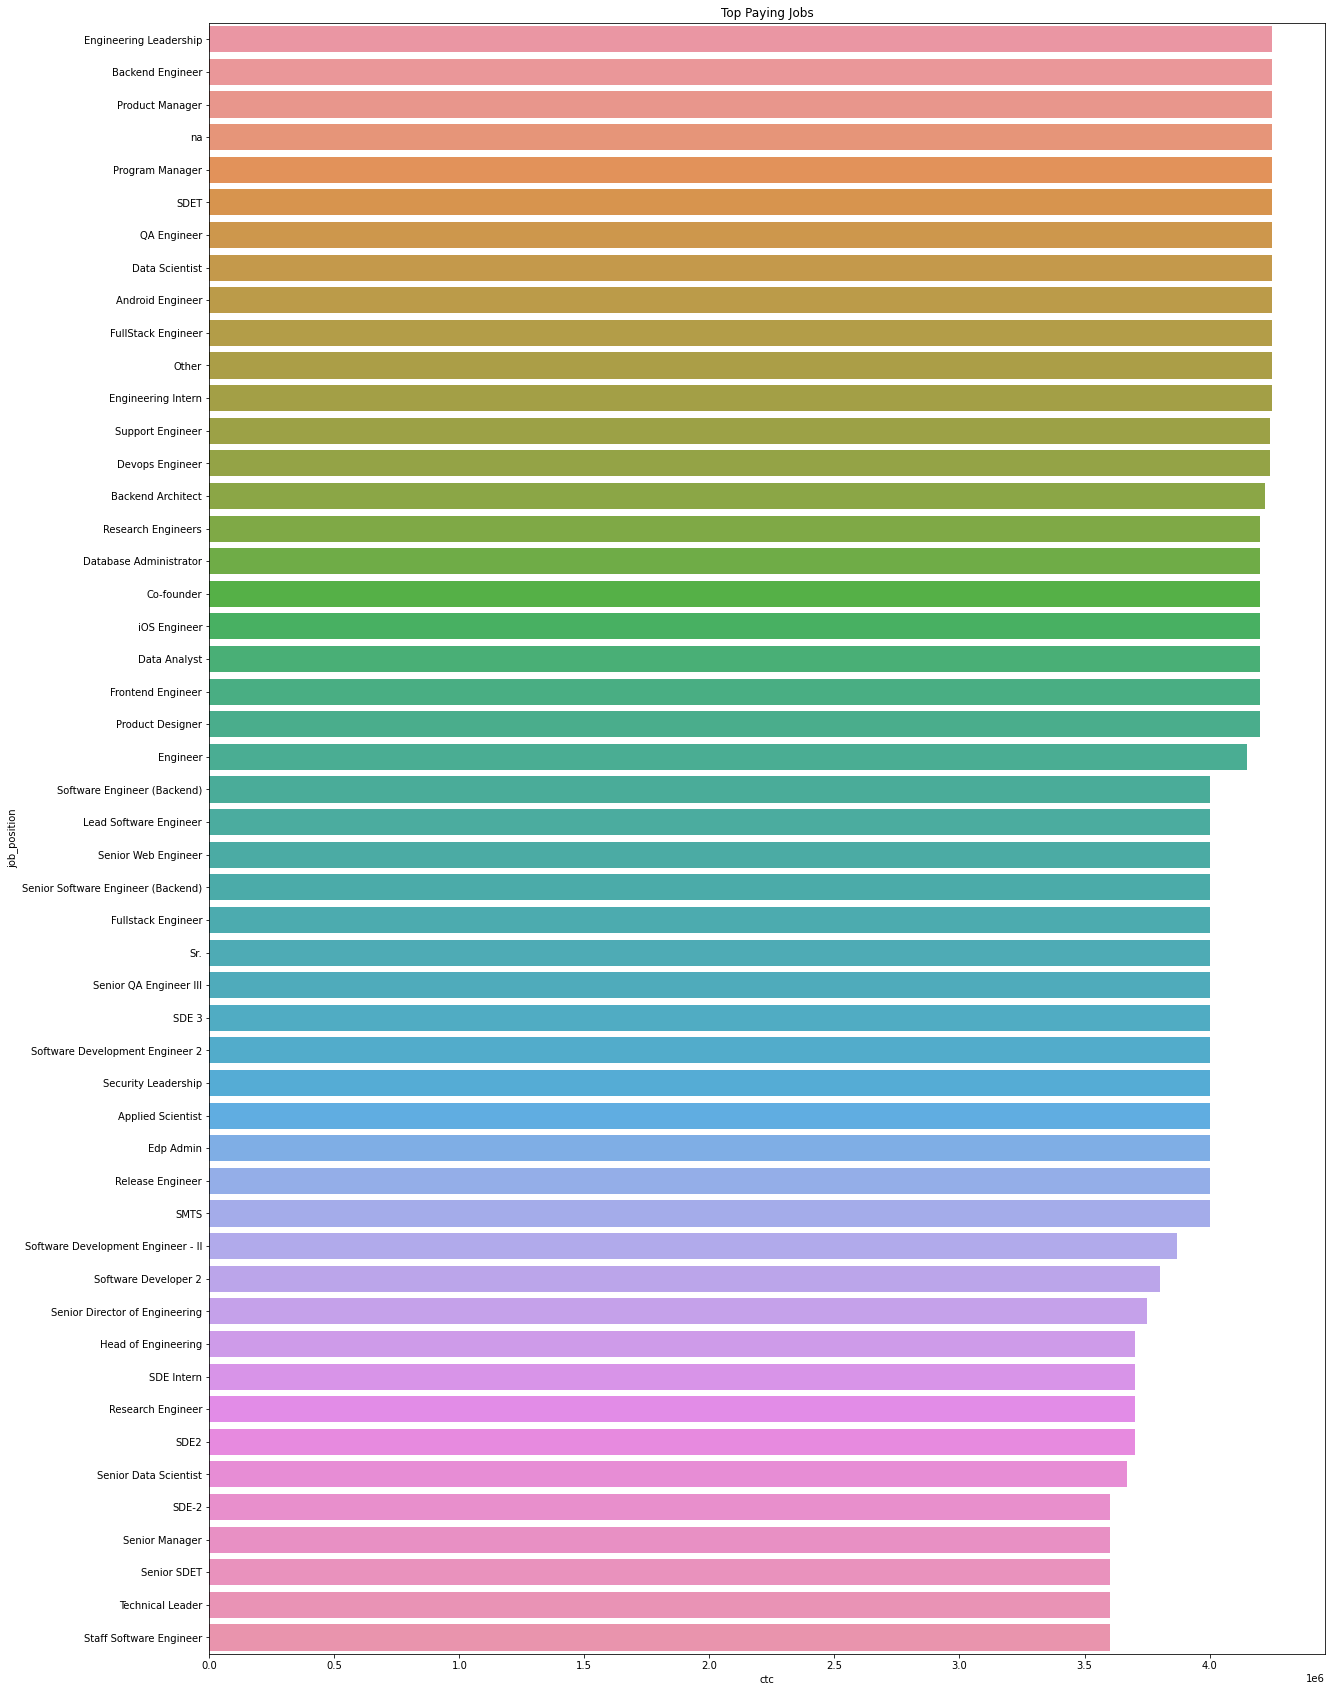

['Engineering Leadership',
 'Backend Engineer',
 'Product Manager',
 'na',
 'Program Manager',
 'SDET',
 'QA Engineer',
 'Data Scientist',
 'Android Engineer',
 'FullStack Engineer',
 'Other',
 'Engineering Intern',
 'Support Engineer',
 'Devops Engineer',
 'Backend Architect',
 'Research Engineers',
 'Database Administrator',
 'Co-founder',
 'iOS Engineer',
 'Data Analyst',
 'Frontend Engineer',
 'Product Designer',
 'Engineer',
 'Software Engineer (Backend)',
 'Lead Software Engineer',
 'Senior Web Engineer',
 'Senior Software Engineer (Backend)',
 'Fullstack Engineer',
 'Sr.',
 'Senior QA Engineer III',
 'SDE 3',
 'Software Development Engineer 2',
 'Security Leadership',
 'Applied Scientist',
 'Edp Admin',
 'Release Engineer',
 'SMTS',
 'Software Development Engineer - II',
 'Software Developer 2',
 'Senior Director of Engineering',
 'Head of Engineering',
 'SDE Intern',
 'Research Engineer',
 'SDE2',
 'Senior Data Scientist',
 'SDE-2',
 'Senior Manager',
 'Senior SDET',
 'Technica

In [30]:
tmp = dftmp.copy()
tmp = tmp.groupby(['job_position']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='job_position').set(title="Top Paying Jobs")
plt.show()
list(tmp['job_position'])

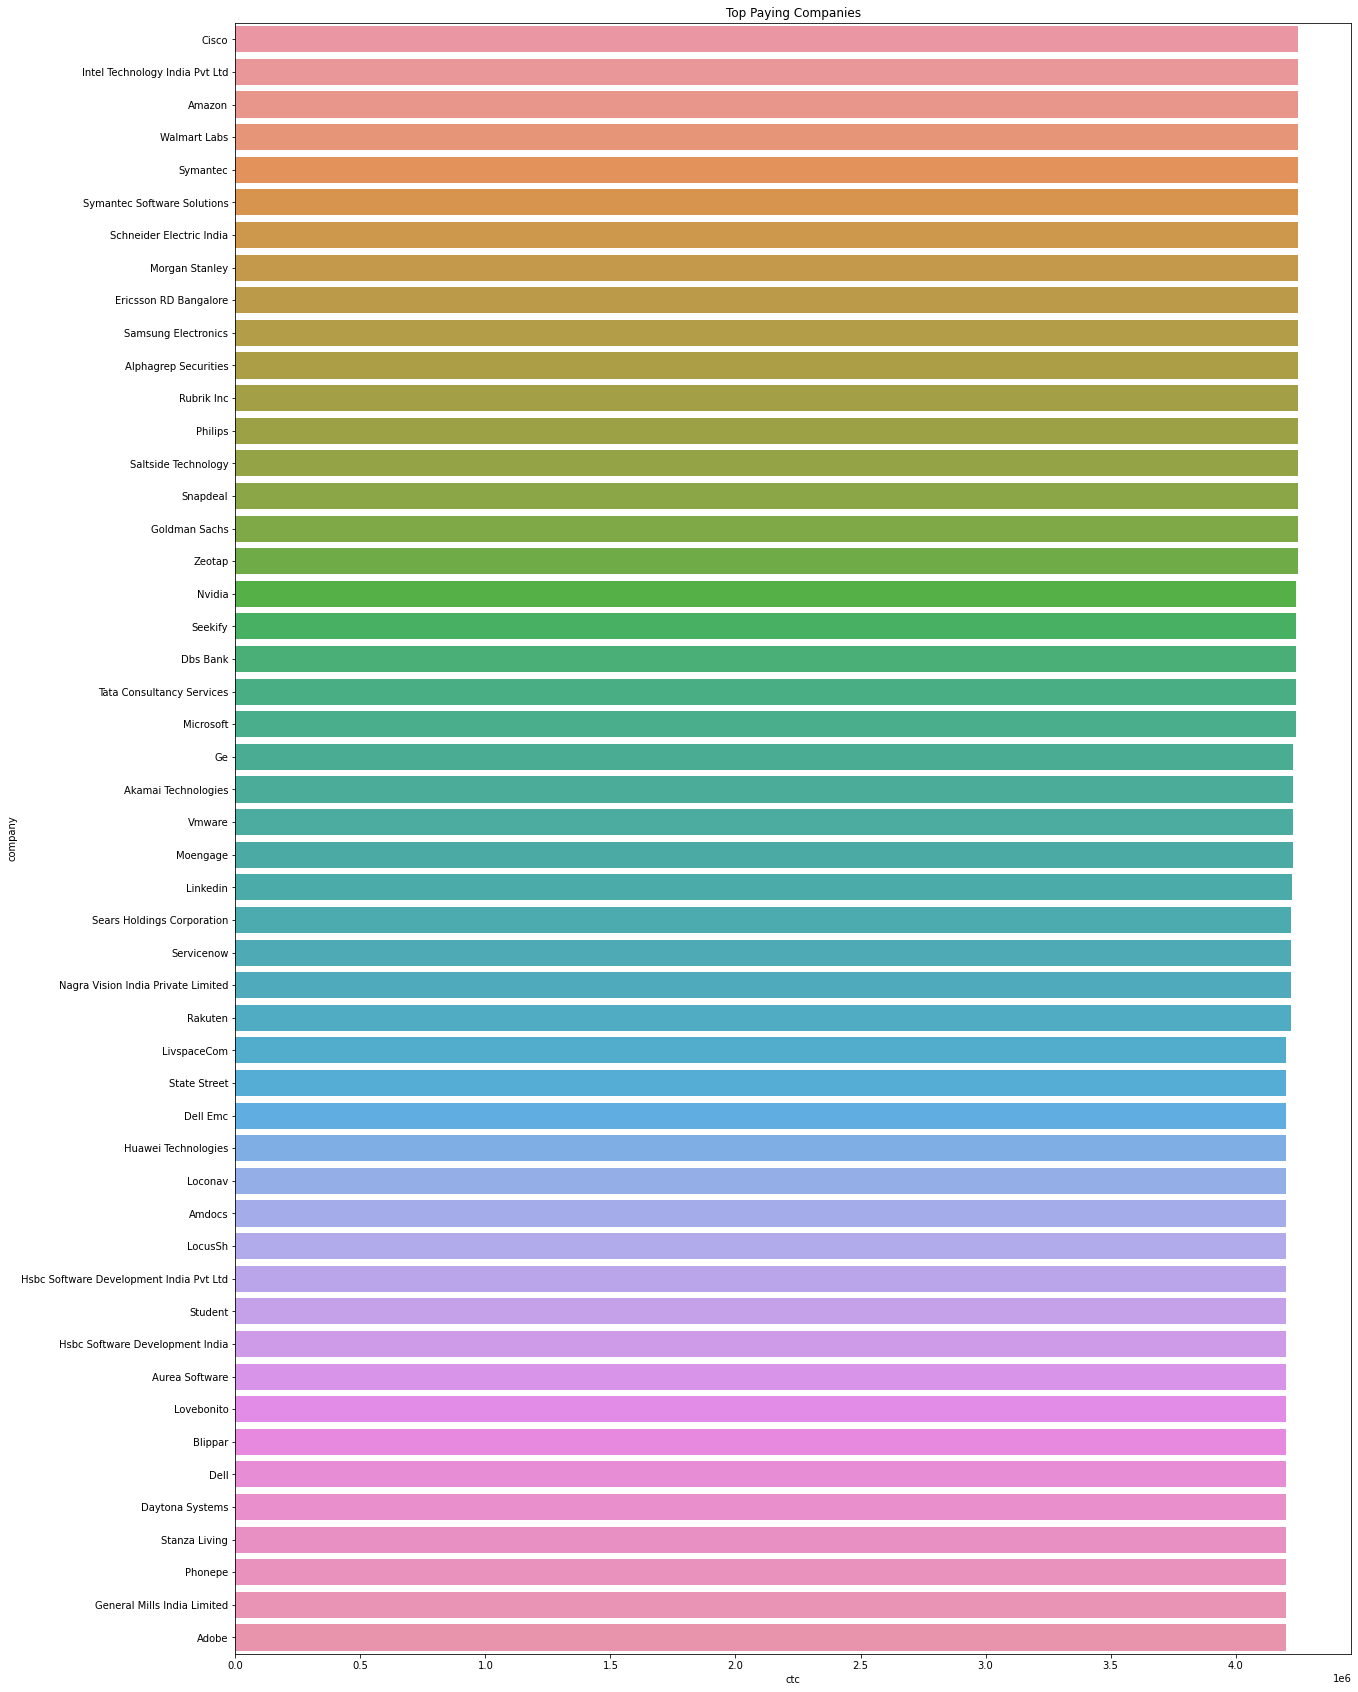

['Cisco',
 'Intel Technology India Pvt Ltd',
 'Amazon',
 'Walmart Labs',
 'Symantec',
 'Symantec Software Solutions',
 'Schneider Electric India',
 'Morgan Stanley',
 'Ericsson RD Bangalore',
 'Samsung Electronics',
 'Alphagrep Securities',
 'Rubrik Inc',
 'Philips',
 'Saltside Technology',
 'Snapdeal',
 'Goldman Sachs',
 'Zeotap',
 'Nvidia',
 'Seekify',
 'Dbs Bank',
 'Tata Consultancy Services',
 'Microsoft',
 'Ge',
 'Akamai Technologies',
 'Vmware',
 'Moengage',
 'Linkedin',
 'Sears Holdings Corporation',
 'Servicenow',
 'Nagra Vision India Private Limited',
 'Rakuten',
 'LivspaceCom',
 'State Street',
 'Dell Emc',
 'Huawei Technologies',
 'Loconav',
 'Amdocs',
 'LocusSh',
 'Hsbc Software Development India Pvt Ltd',
 'Student',
 'Hsbc Software Development India',
 'Aurea Software',
 'Lovebonito',
 'Blippar',
 'Dell',
 'Daytona Systems',
 'Stanza Living',
 'Phonepe',
 'General Mills India Limited',
 'Adobe']

In [31]:
tmp = dftmp.copy()
tmp = tmp.groupby(['company']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='company').set(title="Top Paying Companies")
plt.show()

list(tmp['company'])

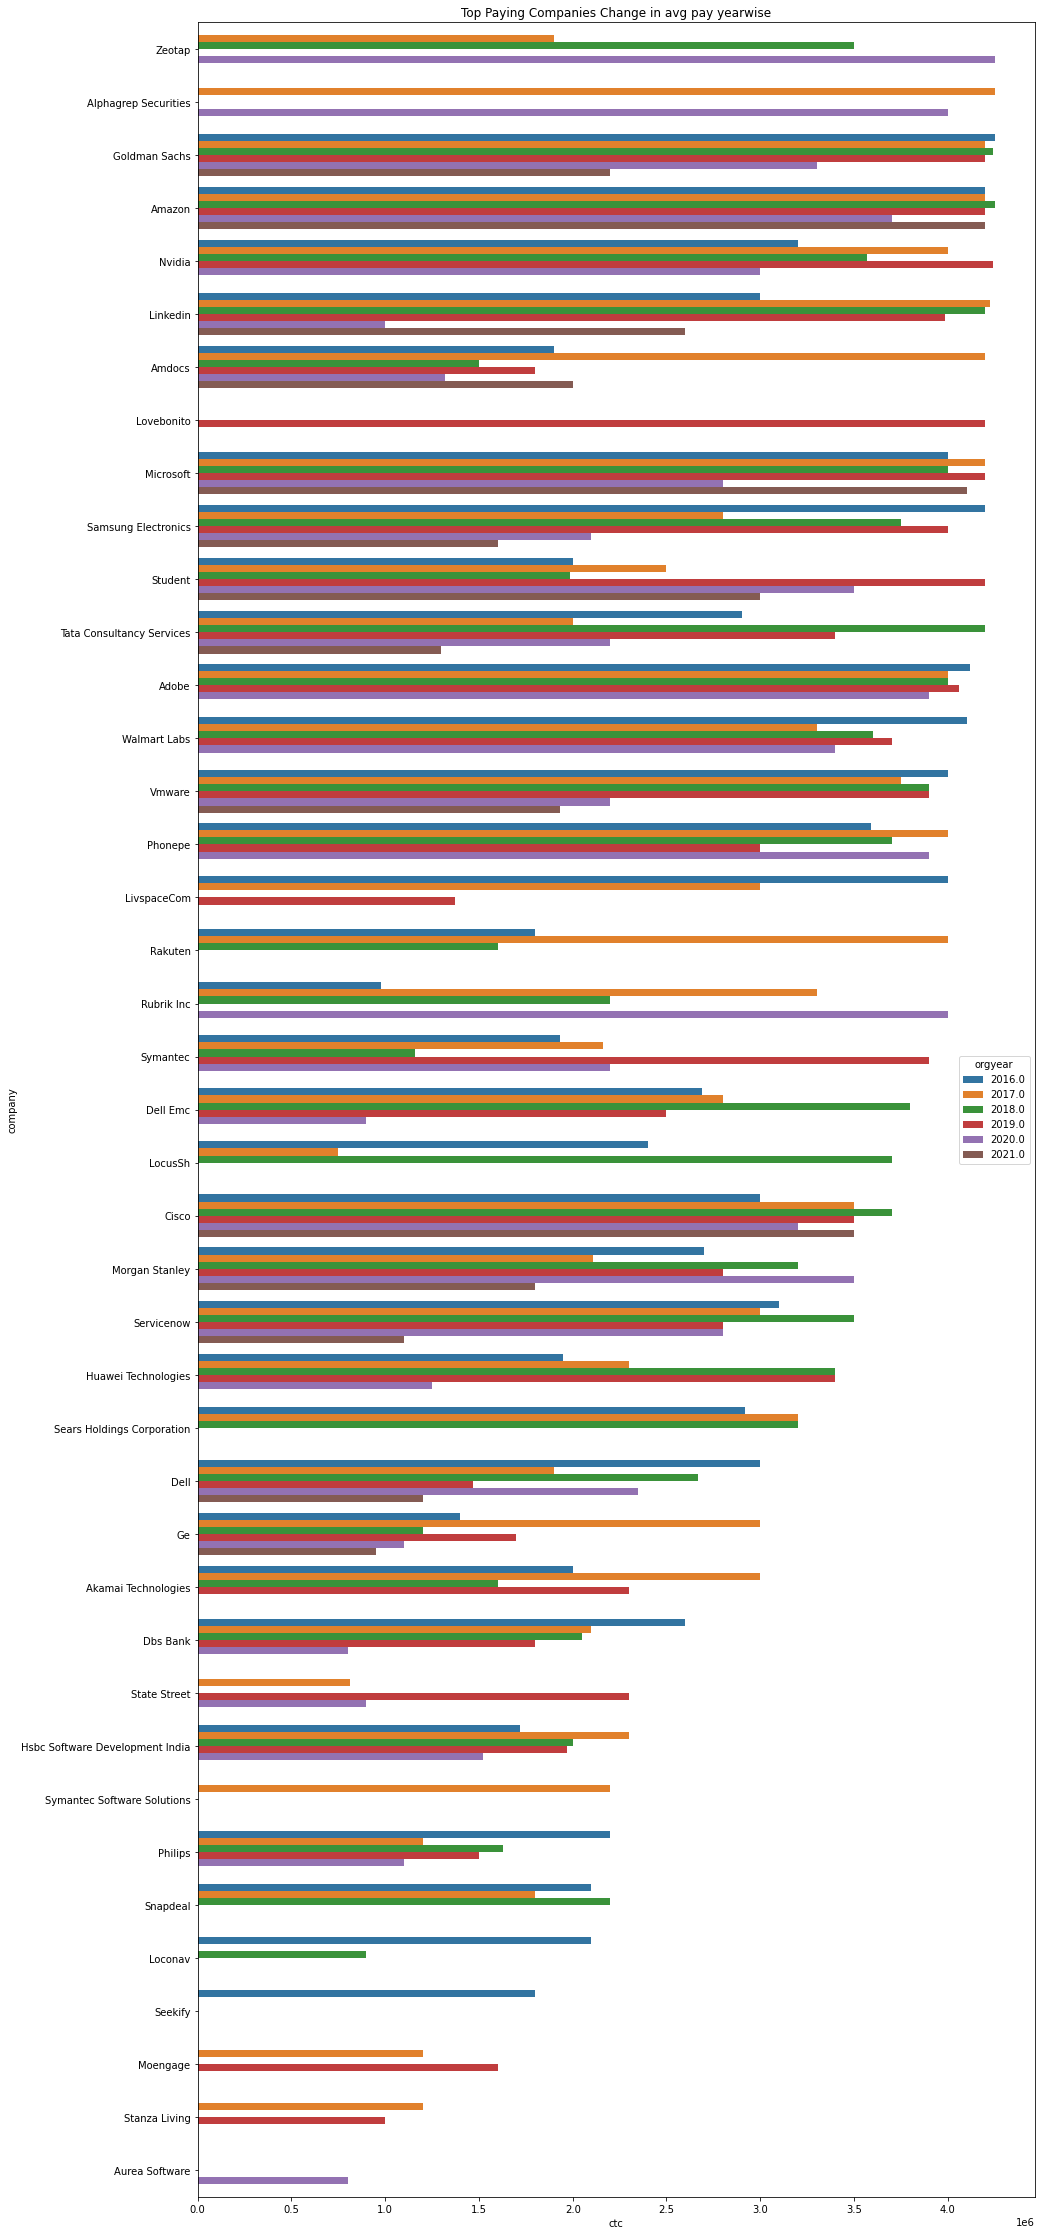

In [32]:
tmp = dftmp.copy()
tmp = tmp[tmp['company'].isin(['Cisco',
 'Intel Technology India Pvt Ltd',
 'Amazon',
 'Walmart Labs',
 'Symantec',
 'Symantec Software Solutions',
 'Schneider Electric India',
 'Morgan Stanley',
 'Ericsson RD Bangalore',
 'Samsung Electronics',
 'Alphagrep Securities',
 'Rubrik Inc',
 'Philips',
 'Saltside Technology',
 'Snapdeal',
 'Goldman Sachs',
 'Zeotap',
 'Nvidia',
 'Seekify',
 'Dbs Bank',
 'Tata Consultancy Services',
 'Microsoft',
 'Ge',
 'Akamai Technologies',
 'Vmware',
 'Moengage',
 'Linkedin',
 'Sears Holdings Corporation',
 'Servicenow',
 'Nagra Vision India Private Limited',
 'Rakuten',
 'LivspaceCom',
 'State Street',
 'Dell Emc',
 'Huawei Technologies',
 'Loconav',
 'Amdocs',
 'LocusSh',
 'Hsbc Software Development India Pvt Ltd',
 'Student',
 'Hsbc Software Development India',
 'Aurea Software',
 'Lovebonito',
 'Blippar',
 'Dell',
 'Daytona Systems',
 'Stanza Living',
 'Phonepe',
 'General Mills India Limited',
 'Adobe'])]
tmp = tmp[tmp['orgyear'] >= 2016]
tmp = tmp.groupby(['company','orgyear']).max()['ctc'].reset_index().sort_values('ctc',ascending=False)
plt.figure(figsize=(15,40))
sns.barplot(data=tmp,x='ctc',y='company',hue='orgyear').set(title="Top Paying Companies Change in avg pay yearwise")
plt.show()



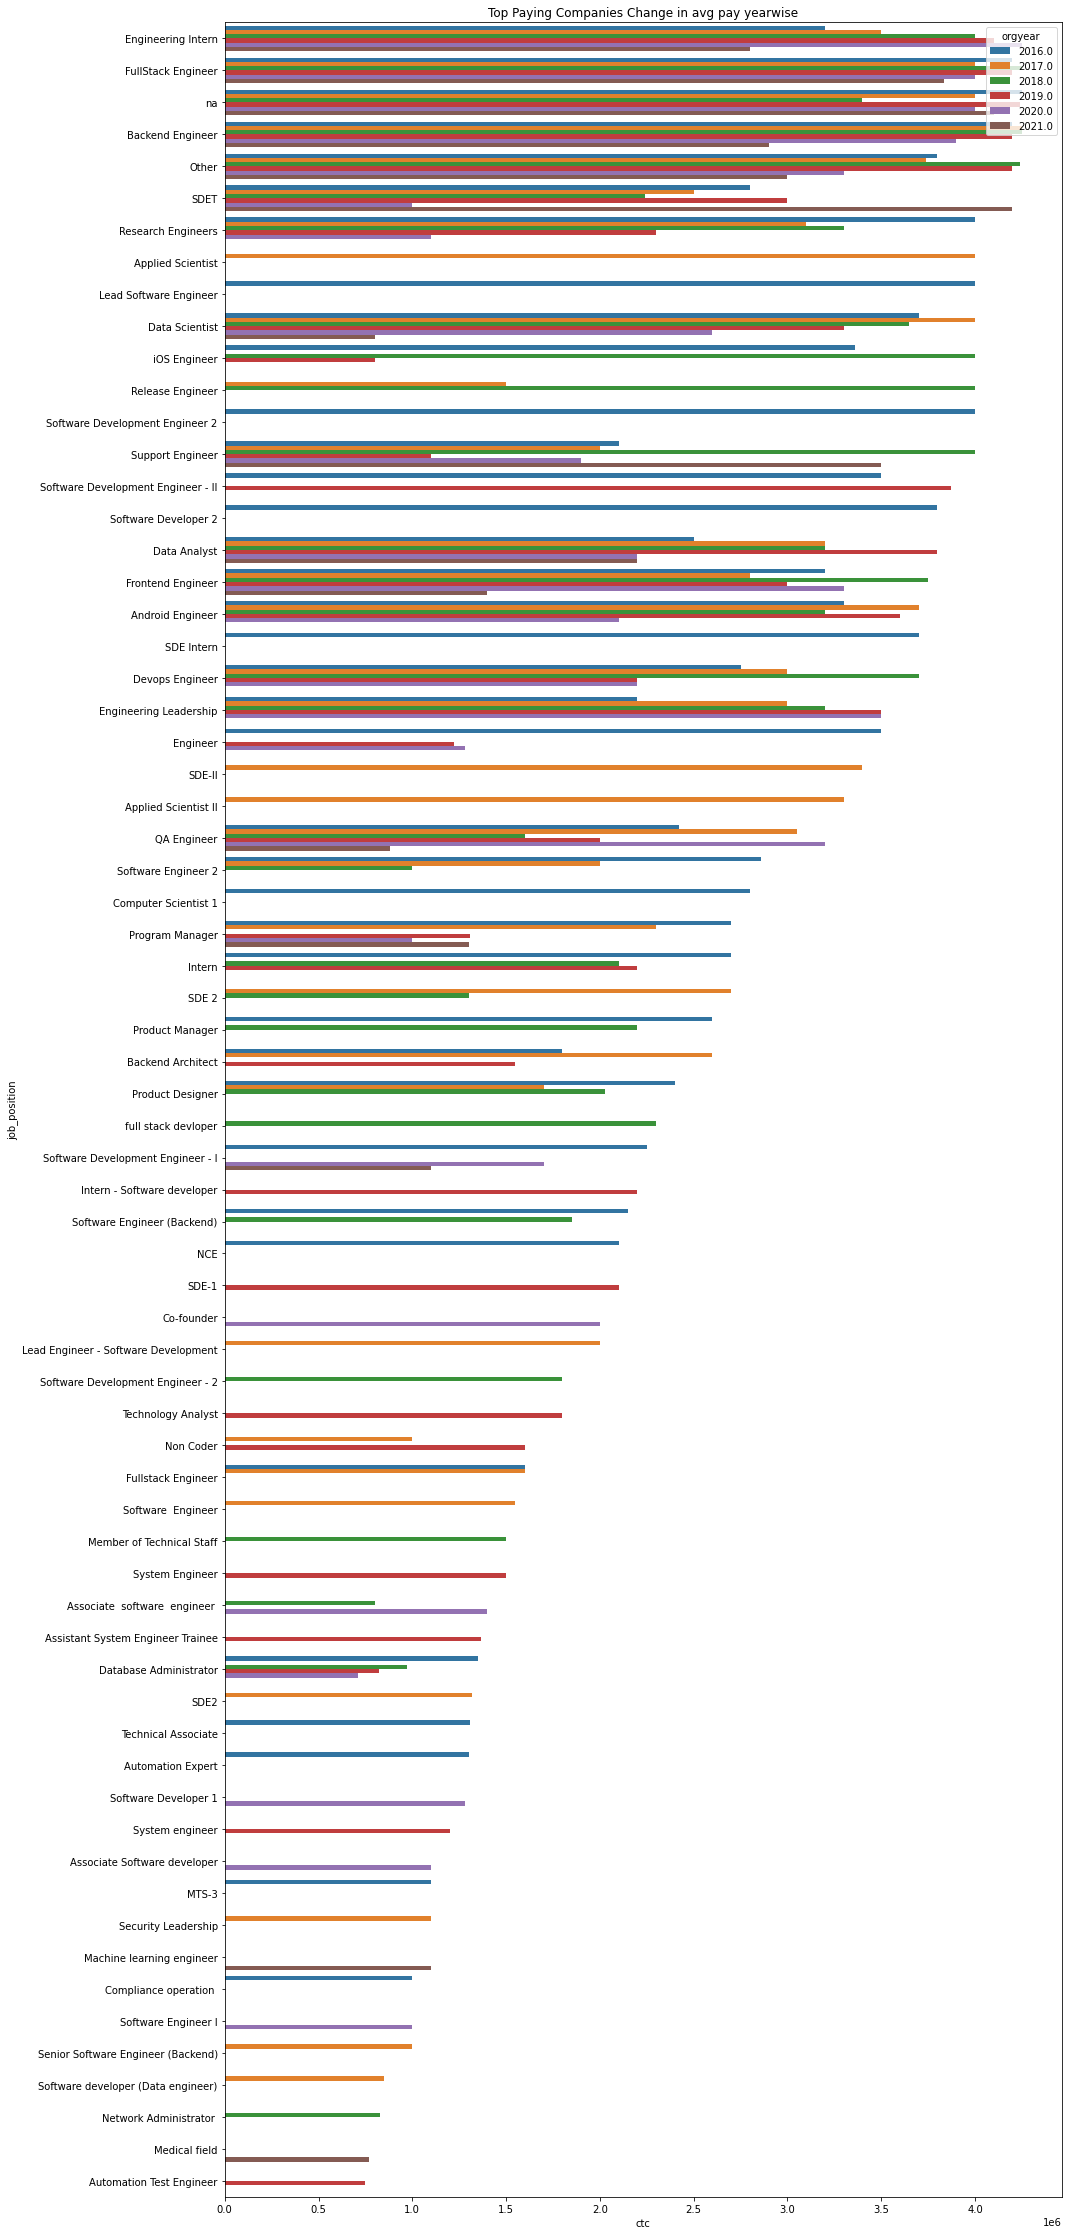

In [33]:
tmp = dftmp.copy()
tmp = tmp[tmp['company'].isin(['Cisco',
 'Intel Technology India Pvt Ltd',
 'Amazon',
 'Walmart Labs',
 'Symantec',
 'Symantec Software Solutions',
 'Schneider Electric India',
 'Morgan Stanley',
 'Ericsson RD Bangalore',
 'Samsung Electronics',
 'Alphagrep Securities',
 'Rubrik Inc',
 'Philips',
 'Saltside Technology',
 'Snapdeal',
 'Goldman Sachs',
 'Zeotap',
 'Nvidia',
 'Seekify',
 'Dbs Bank',
 'Tata Consultancy Services',
 'Microsoft',
 'Ge',
 'Akamai Technologies',
 'Vmware',
 'Moengage',
 'Linkedin',
 'Sears Holdings Corporation',
 'Servicenow',
 'Nagra Vision India Private Limited',
 'Rakuten',
 'LivspaceCom',
 'State Street',
 'Dell Emc',
 'Huawei Technologies',
 'Loconav',
 'Amdocs',
 'LocusSh',
 'Hsbc Software Development India Pvt Ltd',
 'Student',
 'Hsbc Software Development India',
 'Aurea Software',
 'Lovebonito',
 'Blippar',
 'Dell',
 'Daytona Systems',
 'Stanza Living',
 'Phonepe',
 'General Mills India Limited',
 'Adobe'])]
tmp = tmp[tmp['orgyear'] >= 2016]
tmp = tmp.groupby(['job_position','orgyear']).max()['ctc'].reset_index().sort_values('ctc',ascending=False)
plt.figure(figsize=(15,40))
sns.barplot(data=tmp,x='ctc',y='job_position',hue='orgyear').set(title="Top Paying Companies Change in avg pay yearwise")
plt.show()



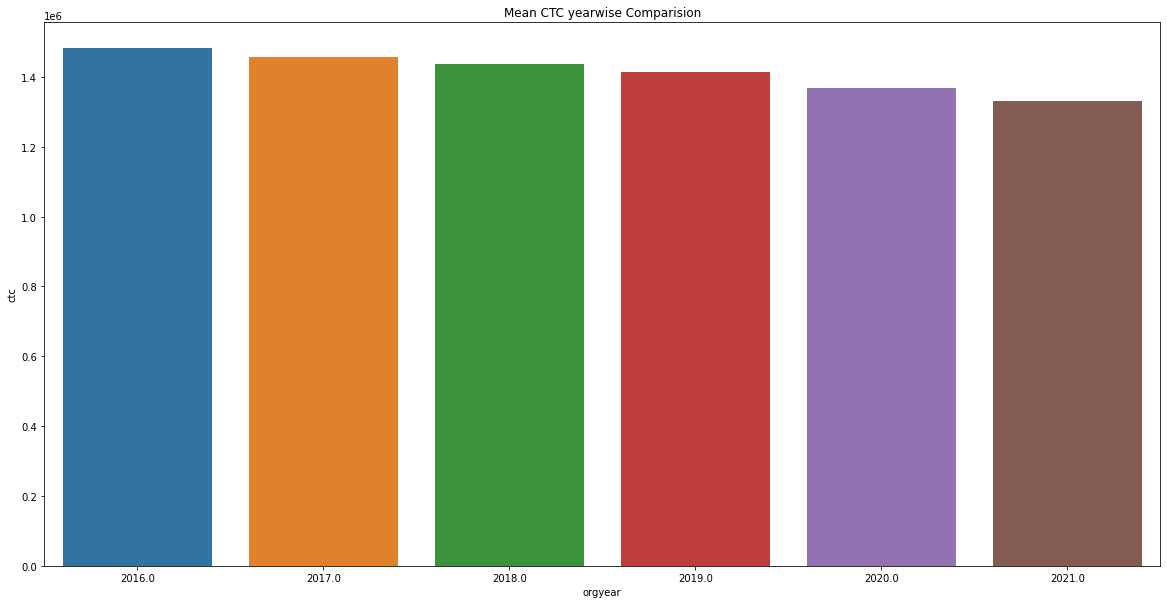

In [34]:
tmp = dftmp.copy()

tmp = tmp[tmp['orgyear'] >= 2016]
tmp = tmp.groupby(['orgyear']).mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,10))
sns.barplot(data=tmp,y='ctc',x='orgyear').set(title="Mean CTC yearwise Comparision")
plt.show()



<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:175%;padding: 10px;"><b> Manual Clustering</b></p>
    </div>

In [35]:
grp = ['company','job_position','YoE']
data_tmp1 = dateda.groupby(grp).agg({'ctc':['mean','median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)

datatmp = dateda.merge(data_tmp1[['company', 'job_position', 'YoE', 'mean ctc']],on=['company', 'job_position', 'YoE'],how='left')



col1 = 'ctc'
col2 = 'mean ctc' 
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]
    
datatmp['Designation'] = np.select(conditions, choices, default=np.nan)


In [36]:
grp = ['company','job_position']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean2','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean2 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean2 ctc' 
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]
    
datatmp['Class'] = np.select(conditions, choices, default=np.nan)

In [37]:
grp = ['company']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean3','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean3 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean3 ctc' 
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]
    
datatmp['Tier'] = np.select(conditions, choices, default=np.nan)

In [38]:
datatmp['diff_desig'] = datatmp['ctc'] - datatmp['mean ctc']
datatmp['diff_class'] = datatmp['ctc'] - datatmp['mean2 ctc']
datatmp['diff_tier'] = datatmp['ctc'] - datatmp['mean3 ctc']

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:175%;padding: 10px;"><b>Answering question based on manual clustering</b></p>
    </div>
    

<b>Top 10 employees (earning more than most of the employees in the company) - Tier 1 </b>

In [39]:
datatmp[datatmp['Tier'] == 1].sort_values('diff_tier',ascending=False).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
76180,e15abfd41c005995728191e49ef001e83e813cd3ed5104...,4240000,1.051315e+06
49030,90d5114ca752c55babef2c517ac8b17aaee3d9ff5740de...,4200000,1.051315e+06
59575,b022b84623593cc38a3c1d39d4545b368a7b5f286be1c7...,4200000,1.051315e+06
54761,a1c1c8919e2918b24241a40271e02381daf199c61d7a3b...,4200000,1.144189e+06
70667,d13d7376e9ced16b4e250d0643f9139f8b36a62847f71b...,4200000,1.147773e+06
14808,2b10e1d996c6ab5e175eea35ca25ea7afbaacd1237ab64...,4200000,1.157302e+06
31649,5d872e52cb535a71fc75a5a97e779bb4c1554d0baa920d...,4200000,1.157302e+06
47727,8d0ed00904247626f5557f5983feeb5a0567d7726eea39...,4200000,1.176534e+06
31826,5dff6a65d548553262b6a289f014b2b72a5d47ff6dfa5c...,4170000,1.165011e+06
45627,86b90dd64ddb663ea35be98422947a01ba9ab837fb76df...,4000000,1.051315e+06


<b>Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1</b>

In [40]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 1)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=False).head(10)[['email_hash','ctc','mean2 ctc']]

,email_hash,ctc,mean2 ctc
81289,f04a0228e5af6f8f6ecc33e089892e80d85b3c749b3244...,4000000,1.533750e+06
56231,a63f3f44de7586430615a8a9bd13d41e7b0d541ca0f690...,4200000,1.862000e+06
16846,31616edfc502824631b11793313d35d5bb2288319dcb25...,3800000,1.513842e+06
21441,3efbb8c4d67b4a4c6ba4c639cd84e9ff98b85d5f57d82f...,3979999,1.716000e+06
33512,62f705ba342cb9e51117446a5522c2e42c14db27b9b20e...,4250000,2.025000e+06
83396,f67ae342b7431f7ab05eca998d904647b02711538aa839...,3750000,1.565556e+06
83524,f6e8c41a40ec308c996d498e22729359d2b564cae037a0...,3500000,1.410000e+06
191,009ded427ebcb5c2fb1970017a683693a7abef0fa96f5e...,3900000,1.834333e+06
79529,eb35a5d34977c6135372e46d6cc4f85332f1a4f9578bd5...,4080000,2.020000e+06
36086,6aa8cfeb5b98da66158e0af4ca8869362174abdba84a02...,3200000,1.233235e+06


<b> Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3</b>

In [41]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 3)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=True).head(10)[['email_hash','ctc','mean2 ctc']]

,email_hash,ctc,mean2 ctc
14514,2a3136f6e2d03a3dbfa3f683e4ae1b744b4815a8e0177c...,1700000,3125000.0
55794,a4f1770283497277f8cd3b7cb04e9b5c3135815eebb4cf...,2300000,3292500.0
48870,9069f6772b1e7959734a115bf49b2168a888608496af50...,1900000,2850000.0
82770,f49bd18e7fe914929f6cc23bb4e7979d58290119f2adcf...,1600000,2500000.0
51648,987a063524741381c302a096e4b019f46088e519f59f4a...,2000000,2750000.0
65945,c371eff30d6983ab69401441f359fed64397f7699c7aff...,1630000,2350000.0
79574,eb5552cf683e3072a7e2e2c6e63ebb46183a716b2bd2a1...,1780000,2496000.0
2812,080c3b2cc8fe9e7743520a3771a3b4db72e49ef2542ebf...,1400000,1986000.0
26908,4fcbc73fbd3da62f8750d69c13846ada4d1302f4817865...,1700000,2250000.0
61631,b63f00fbd2f8774eccde057bbf3f99ae1742adf496b2cc...,1600000,2102500.0


<b> Bottom 10 employees (earning less than most of the employees in the company)- Tier 3</b>

In [42]:
datatmp[datatmp['Tier'] == 3].sort_values('diff_tier',ascending=True).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
12121,2322345290a1926df62347d45f06b68932e219cb010bf8...,850000,3.262923e+06
64065,bda6e0f742115289a27f304078935331a5563d90c91461...,750000,2.929000e+06
15908,2e7e946b56a245338d8da1daf60ef851031c9964cffd25...,950000,2.950000e+06
4334,0c535bb44414d62cab133425339bd7e156ec79823899ae...,810000,2.770000e+06
49904,935480e039d80833292d858a553a4bc0f628b9b97ce9ec...,900000,2.840543e+06
73476,d96a6540ff59456abe30f51f68e954388b1f6922c4bb0c...,900000,2.840543e+06
19346,38d71a484d7663f7c14df8432620bbbab718933173a295...,1368000,3.262923e+06
70292,d034e386dbce817ee1ea099b161379d3341af0a16573d8...,800000,2.683125e+06
36006,6a6d1a4452505b678e264700fd0c28f247c4522d27f112...,770000,2.637273e+06
2612,077fd3f95d8dbf89c112a8eca6601db3729f51b53b57a0...,720000,2.577054e+06


<b>Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X</b>

In [43]:
datatmp[(datatmp['YoE'].isin([5,6,7]))&(datatmp['company'].isin(['Amazon']))].sort_values('diff_desig',ascending=False).head(10)[['email_hash','ctc','mean ctc']]

,email_hash,ctc,mean ctc
54832,a1f32c1afc78650a5701dd0b32c15590d383a02520a755...,4000000,1.494364e+06
9990,1cbc2f4ff908528b918606b070f93b1e644cb956b83e79...,3900000,1.494364e+06
7700,1608ef4352eecde96660f30db82a3c098ee7f3d16f9542...,4000000,2.188000e+06
23513,4577592747a85357070e2ad539e2db011569fb8493d4d1...,4100000,2.400000e+06
71060,d25e73e85f498e7d413fed50097d205a014afb1d9d38db...,4000000,2.330882e+06
22521,4251a130b4dd3ddec21971f642621a5517878a391881ad...,4000000,2.330882e+06
77567,e5893568ff7c6553adda50493f2ffa9005bb410ee98fb4...,4000000,2.330882e+06
72912,d7b4d80f4a290bf75642ee81b60de7bc9f8d99ac02a611...,4220000,2.658768e+06
23699,461034625aaa1bbb5cbc54dc9e9af65673114423d1f51e...,4200000,2.658768e+06
38490,71c17d7d2d6b012855c1034f6220c507d2ff19a5e37140...,4200000,2.658768e+06


<b> Top 10 companies (based on their CTC)</b>

In [44]:
datatmp.groupby('company').mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(10)[['company','ctc']]

,company,ctc
15171,Saltside Technology,4250000.0
5820,Ericsson RD Bangalore,4250000.0
11897,Nagra Vision India Private Limited,4220000.0
1034,Alyosha Technology Consultancy Service,4200000.0
9549,Jiffle Technologies,4200000.0
13690,Playgames 247,4200000.0
7959,Hpe India,4200000.0
8267,Idfc Bank Ltd,4200000.0
1218,Antbrains,4200000.0
19125,Walmart Global Technology Solutions,4200000.0


<b> Top 2 positions in every company (based on their CTC)</b>

In [45]:
tmp = datatmp[datatmp['job_position'] != 'na']
tmp = tmp.groupby(['company','job_position']).mean().sort_values(['company','ctc']).reset_index()
tmp = tmp.groupby('company').head(2)[['company','job_position']]
tmp

,company,job_position
0,,Data Scientist
1,,Backend Engineer
5,Aavenir India,FullStack Engineer
6,Accolite Software,Fullstack Engineer
7,Arcadis Hyderabad Gec India,Data Scientist
...,...,...
32715,Zynga,iOS Engineer
32720,Zynga Game India Pvt Limited,Fullstack Engineer
32721,Zynga Game Network,Product Manager
32722,Zyudly Labs,Data Scientist


<b> Top 2 positions in top Paying companies</b>

In [46]:
tmp[tmp['company'].isin(['Cisco',
 'Intel Technology India Pvt Ltd',
 'Amazon',
 'Walmart Labs',
 'Symantec',
 'Symantec Software Solutions',
 'Schneider Electric India',
 'Morgan Stanley',
 'Ericsson RD Bangalore',
 'Samsung Electronics',
 'Alphagrep Securities',
 'Rubrik Inc',
 'Philips',
 'Saltside Technology',
 'Snapdeal',
 'Goldman Sachs',
 'Zeotap',
 'Nvidia',
 'Seekify',
 'Dbs Bank',
 'Tata Consultancy Services',
 'Microsoft',
 'Ge',])]

,company,job_position
1463,Alphagrep Securities,Other
1464,Alphagrep Securities,Backend Engineer
1663,Amazon,Medical field
1664,Amazon,Compliance operation
5468,Cisco,Product Designer
5469,Cisco,SE(R&D)
7337,Dbs Bank,Data Analyst
7338,Dbs Bank,SDET
9261,Ericsson RD Bangalore,Engineering Leadership
10982,Ge,Support Engineer


<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Preparing data for training model(Imputation/Scaling)</p>
</div>    

In [47]:
data = dateda.copy()
data

,email_hash,Unnamed: 0,company,normalized_company_name,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,normalized_company_name_na,company_na,job_position_na,YoE,company_encode,job_position_encode
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,Microsoft,Microsoft,2012.0,3500000,Backend Engineer,2019.0,False,False,False,False,False,7.0,0.010160,2431.717315
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,Microsemi Corporation,Microsemi Corporation,2004.0,2000000,FullStack Engineer,2021.0,False,False,False,False,False,17.0,0.000072,1319.056588
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,Walmart Labs,Walmart,2009.0,3400000,na,2018.0,False,False,False,False,True,9.0,0.003767,1318.013855
6,00022dc29c7f77032275182b883d4f273ea1007aefc437...,7782,Infracloud Technologies,Not Available,2016.0,750000,Frontend Engineer,2019.0,False,False,True,False,False,3.0,0.000026,604.263472
7,00036c2c5212d88d07acdc5bda7eef5653f8b09bbe30b7...,30543,Svp Itqan Oman,Not Available,2011.0,2300000,Other,2021.0,False,False,True,False,False,10.0,0.000007,1026.830810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153432,fffa3a7b849802580a1972f11d192b43ff1c871bb43002...,79890,Tata Consultancy Services,Tata Consultancy Services,2014.0,1800000,Backend Engineer,2019.0,False,False,False,False,False,5.0,0.034228,2431.717315
153438,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,39683,Ericsson Software Campus,Not Available,2004.0,3529999,QA Engineer,2019.0,False,False,True,False,False,15.0,0.000007,401.973371
153439,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,186656,Eltravo,Not Available,2015.0,1600000,na,2018.0,False,False,True,False,True,3.0,0.000007,1318.013855
153440,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,148878,Ntt Data Global Delivery Services,Not Available,2014.0,900000,Devops Engineer,2019.0,False,False,True,False,False,5.0,0.000124,279.908500


<b>Transforming ctc feature using log function</b>

In [48]:
data['ctc_log'] = np.log2(data['ctc'])

<b> Columns like ['normalized_company_name','job_position','email_hash','Unnamed: 0','company'] are text.<br> We can't use them during imputation, so we'll remove these columns</b>

In [49]:
drop_cols = ['normalized_company_name','job_position','email_hash','Unnamed: 0','company']
for i in drop_cols:
    try:
        data.drop([i],axis=1,inplace=True)
    except:
        print('no')

In [50]:
data.columns

Index(['orgyear', 'ctc', 'ctc_updated_year', 'orgyear_na',
       'ctc_updated_year_na', 'normalized_company_name_na', 'company_na',
       'job_position_na', 'YoE', 'company_encode', 'job_position_encode',
       'ctc_log'],
      dtype='object')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86464 entries, 0 to 153442
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   orgyear                     86424 non-null  float64
 1   ctc                         86464 non-null  int64  
 2   ctc_updated_year            86464 non-null  float64
 3   orgyear_na                  86464 non-null  bool   
 4   ctc_updated_year_na         86464 non-null  bool   
 5   normalized_company_name_na  86464 non-null  bool   
 6   company_na                  86464 non-null  bool   
 7   job_position_na             86464 non-null  bool   
 8   YoE                         86424 non-null  float64
 9   company_encode              86464 non-null  float64
 10  job_position_encode         86464 non-null  float64
 11  ctc_log                     86464 non-null  float64
dtypes: bool(5), float64(6), int64(1)
memory usage: 5.7 MB


<b>Summary Statistics</b>

In [52]:
data.describe()

,orgyear,ctc,ctc_updated_year,YoE,company_encode,job_position_encode,ctc_log
count,86424.000000,8.646400e+04,86464.000000,86424.000000,86464.000000,86464.000000,86464.000000
mean,2013.804626,1.626541e+06,2019.441432,5.636906,0.002627,1209.710671,20.474913
std,4.354664,8.080584e+05,1.283791,4.225522,0.005556,878.503304,0.662649
min,1970.000000,7.040000e+05,2015.000000,0.000000,0.000007,0.065171,19.425216
25%,2012.000000,1.000000e+06,2019.000000,3.000000,0.000033,319.141310,19.931569
50%,2015.000000,1.400000e+06,2019.000000,5.000000,0.000365,1318.013855,20.416995
75%,2017.000000,2.000000e+06,2020.000000,8.000000,0.002098,2431.717315,20.931569
max,2021.000000,4.250000e+06,2021.000000,51.000000,0.034228,2431.717315,22.019031


In [53]:
data.isna().sum()

orgyear                       40
ctc                            0
ctc_updated_year               0
orgyear_na                     0
ctc_updated_year_na            0
normalized_company_name_na     0
company_na                     0
job_position_na                0
YoE                           40
company_encode                 0
job_position_encode            0
ctc_log                        0
dtype: int64

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Training Model</p>
</div>    

In [54]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:175%;padding: 10px;"><b>Kmeans clustering</b></p>
    </div>
    

<div style="font-family:verdana; word-spacing:1.5px;">
    Standardizing data before applyting unsupervised algorithm can have consequences as stated in question, 
    <br><br>  
</div>

So we will be training a model with unscaled features too.

In [55]:
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform"))])
pipe_knn_5 = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])
pipe = Pipeline([('scaler', StandardScaler()), ('simple_imputer',  SimpleImputer(missing_values=np.nan, strategy='mean'))])
pipe_knn_pca = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform")),('pca',PCA(n_components=8))])
pipe_unscaled = Pipeline([('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])


<b> Finding optimal num of clusters using Elbow method</b>

Running for  KNN Immputation


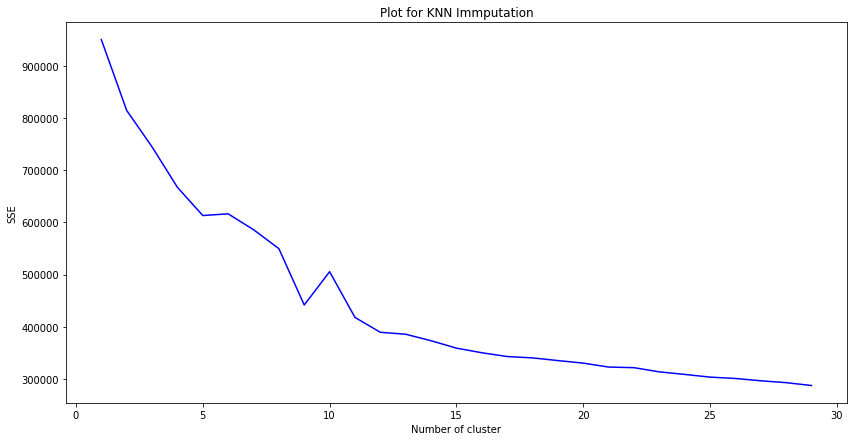

Running for  KNN Imputation with (default) 5 neighbours


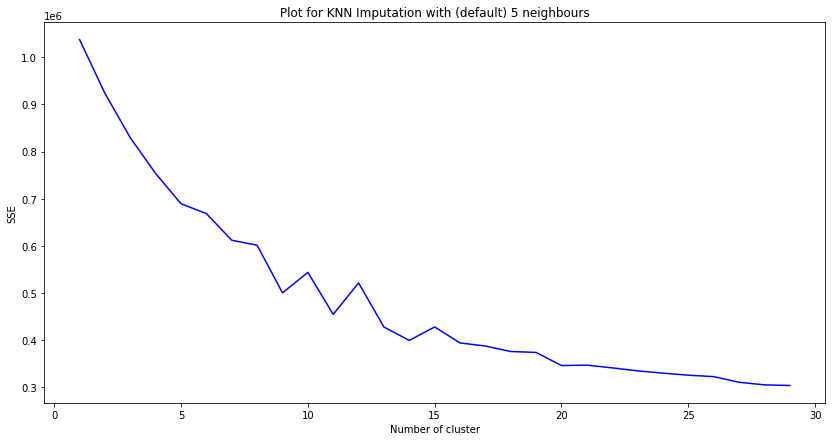

Running for  Mean Imputation 


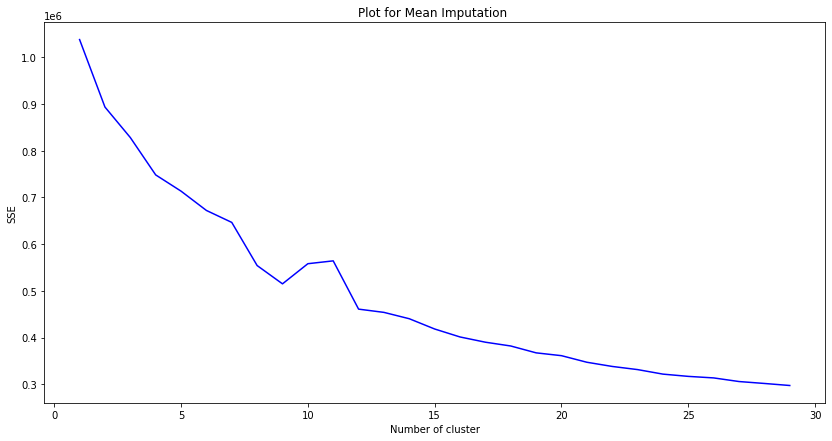

Running for  KNN Immputation + PCA


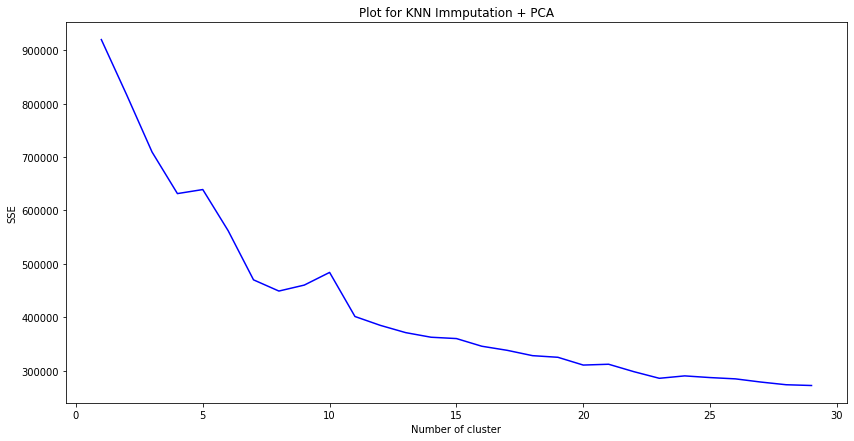

Running for  KNN Imputation Unscaled data


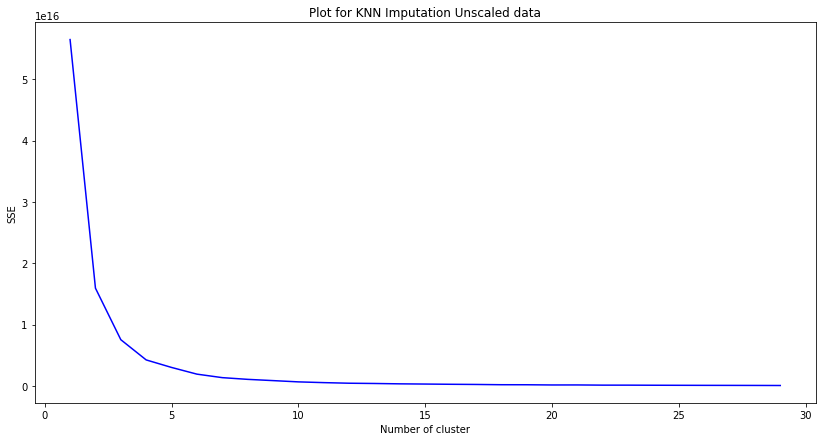

In [56]:
for name,pipeline in [('KNN Immputation',pipe_knn),('KNN Imputation with (default) 5 neighbours',pipe_knn_5),('Mean Imputation ',pipe),
                      ('KNN Immputation + PCA', pipe_knn_pca),('KNN Imputation Unscaled data',pipe_unscaled )]:

    X = pipeline.fit_transform(data)
    X = pd.DataFrame(X)
    if "PCA" not in name :
        X.columns= data.columns

    sse = {}
    #sil_score = {}
    print("Running for ",name)
    for k in range(1, 30):
        #print('K :',k)
        kmeans = MiniBatchKMeans(init="k-means++",n_clusters=k,
                              random_state=0).fit(X)
        label = kmeans.labels_
        data["clusters"] = label
        #print(data["clusters"])
        sse[k] = kmeans.inertia_ 

        #sil_score[k] = silhouette_score(X, label, metric='euclidean')

    plt.figure(figsize=(14,7))
    plt.plot(list(sse.keys()), list(sse.values()),'b-',label='Sum of squared error')
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.title("Plot for "+name)
    plt.show()




<!-- <h2><b>Insights</b></h2>

<table>
<tbody>
<tr style="height: 23px;">
<td style="height: 23px;">Model</td>
<td style="height: 23px;">n_clusters</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">KNN Immputation</td>
<td style="height: 23px;">&nbsp;16</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">KNN Imputation with (default) 5 neighbours</td>
<td style="height: 23px;">&nbsp;20</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">Mean Imputation</td>
<td style="height: 23px;">&nbsp;25</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">KNN Immputation + PCA</td>
<td style="height: 23px;">&nbsp;21</td>
</tr>
<tr style="height: 23.5px;">
<td style="height: 23.5px;">KNN Imputation Unscaled data</td>
<td style="height: 23.5px;">&nbsp;5</td>
</tr>
</tbody>
</table>
<br>
<br>
<b> Number of clusters is around 16-20 for scaled data, while around 5 for unscaled data</b> -->

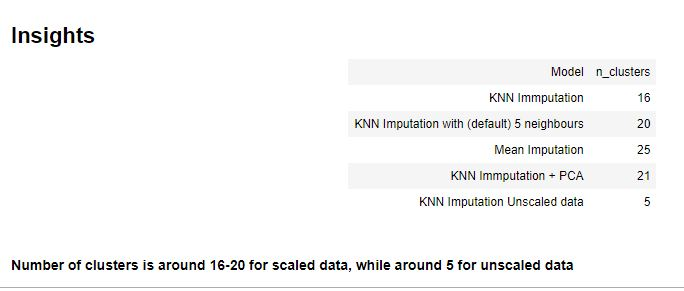

In [3]:
from IPython import display
display.Image("E:\\1.SCALER\\Classes\\BusinessCase Studies\\11.Business Case Scaler - Clustering\\latest_data\insights.JPG")

In [57]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:175%;padding: 10px;"><b>Agglomerative Clustering</b></p>
    </div>
    

In [58]:
tmp = X.sample(frac=0.2)

tmp.shape

(17293, 13)

In [59]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    
    dendrogram(linkage_matrix, **kwargs)

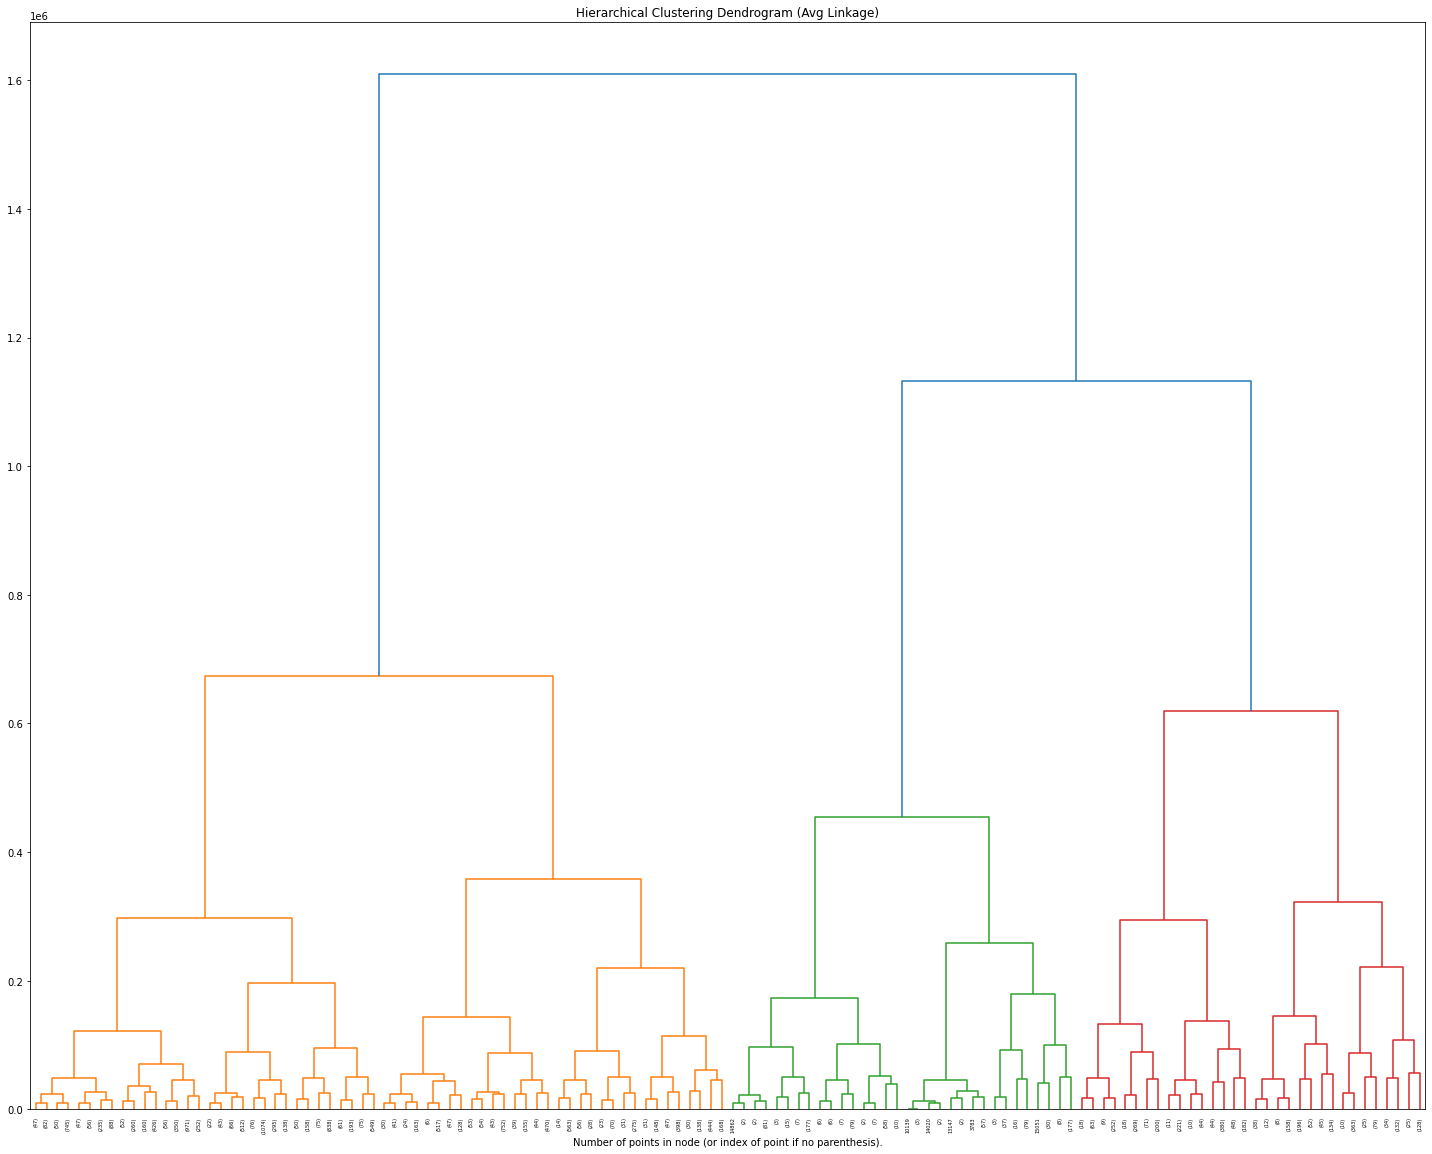

In [60]:

model = AgglomerativeClustering(distance_threshold =0, n_clusters=None, compute_distances=True,linkage='average').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Avg Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

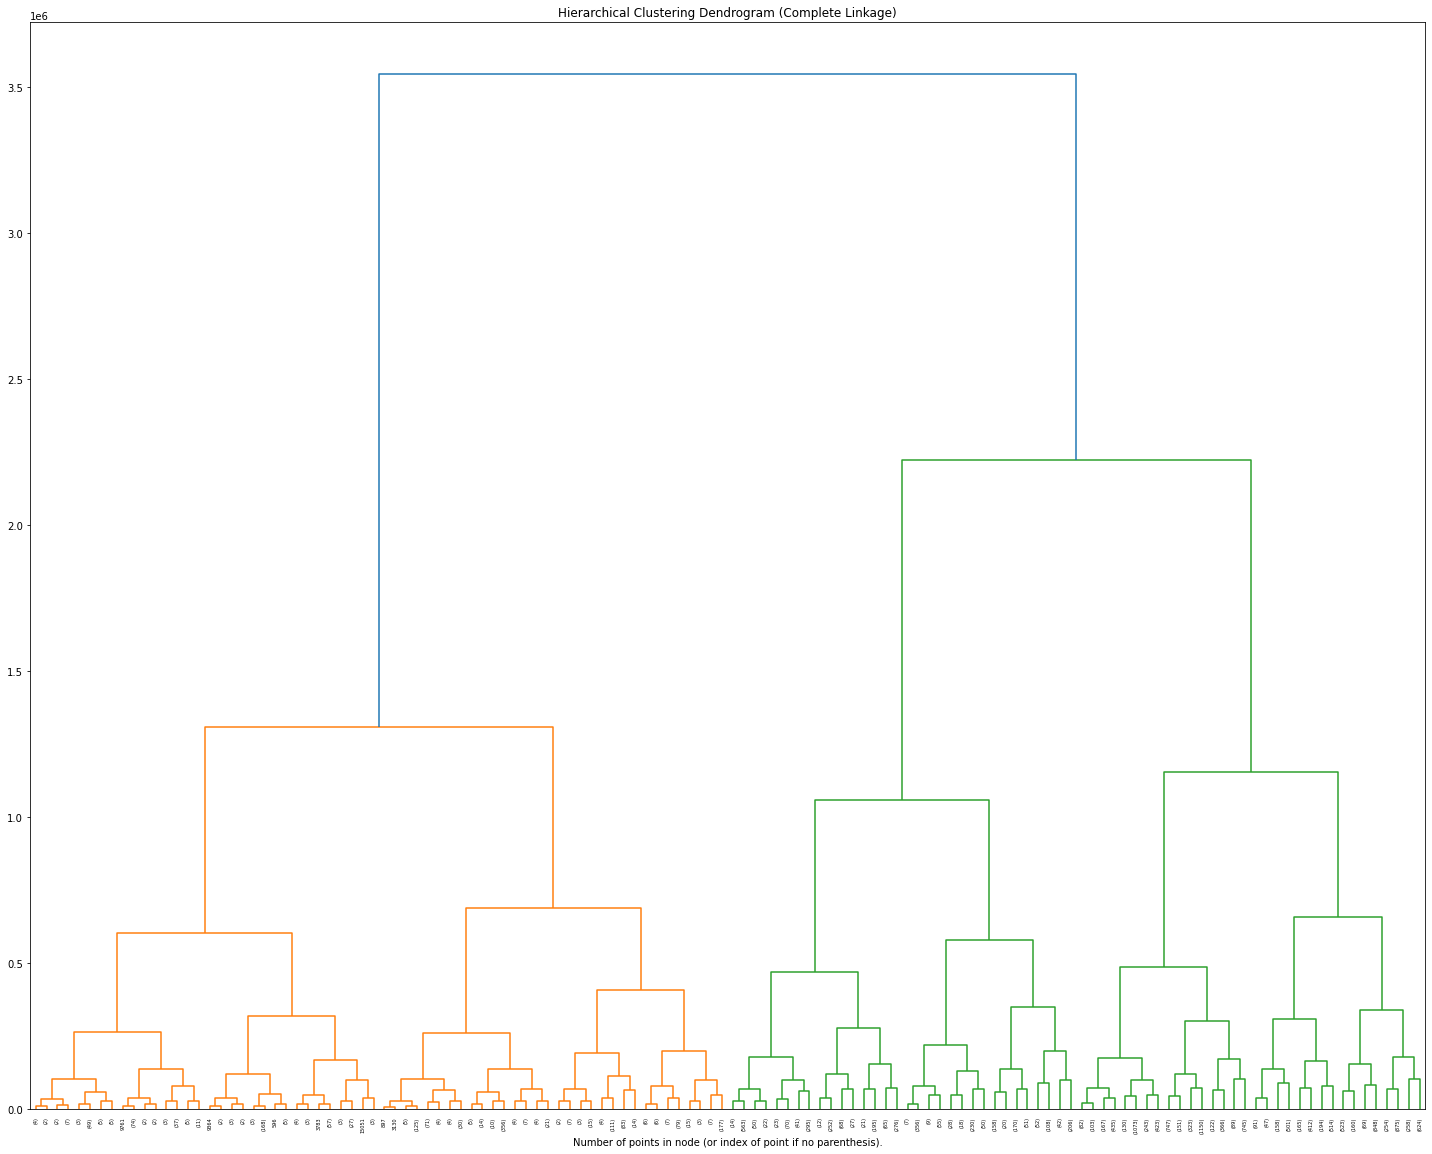

In [61]:

model = AgglomerativeClustering(distance_threshold =0, n_clusters=None, compute_distances=True,linkage='complete').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

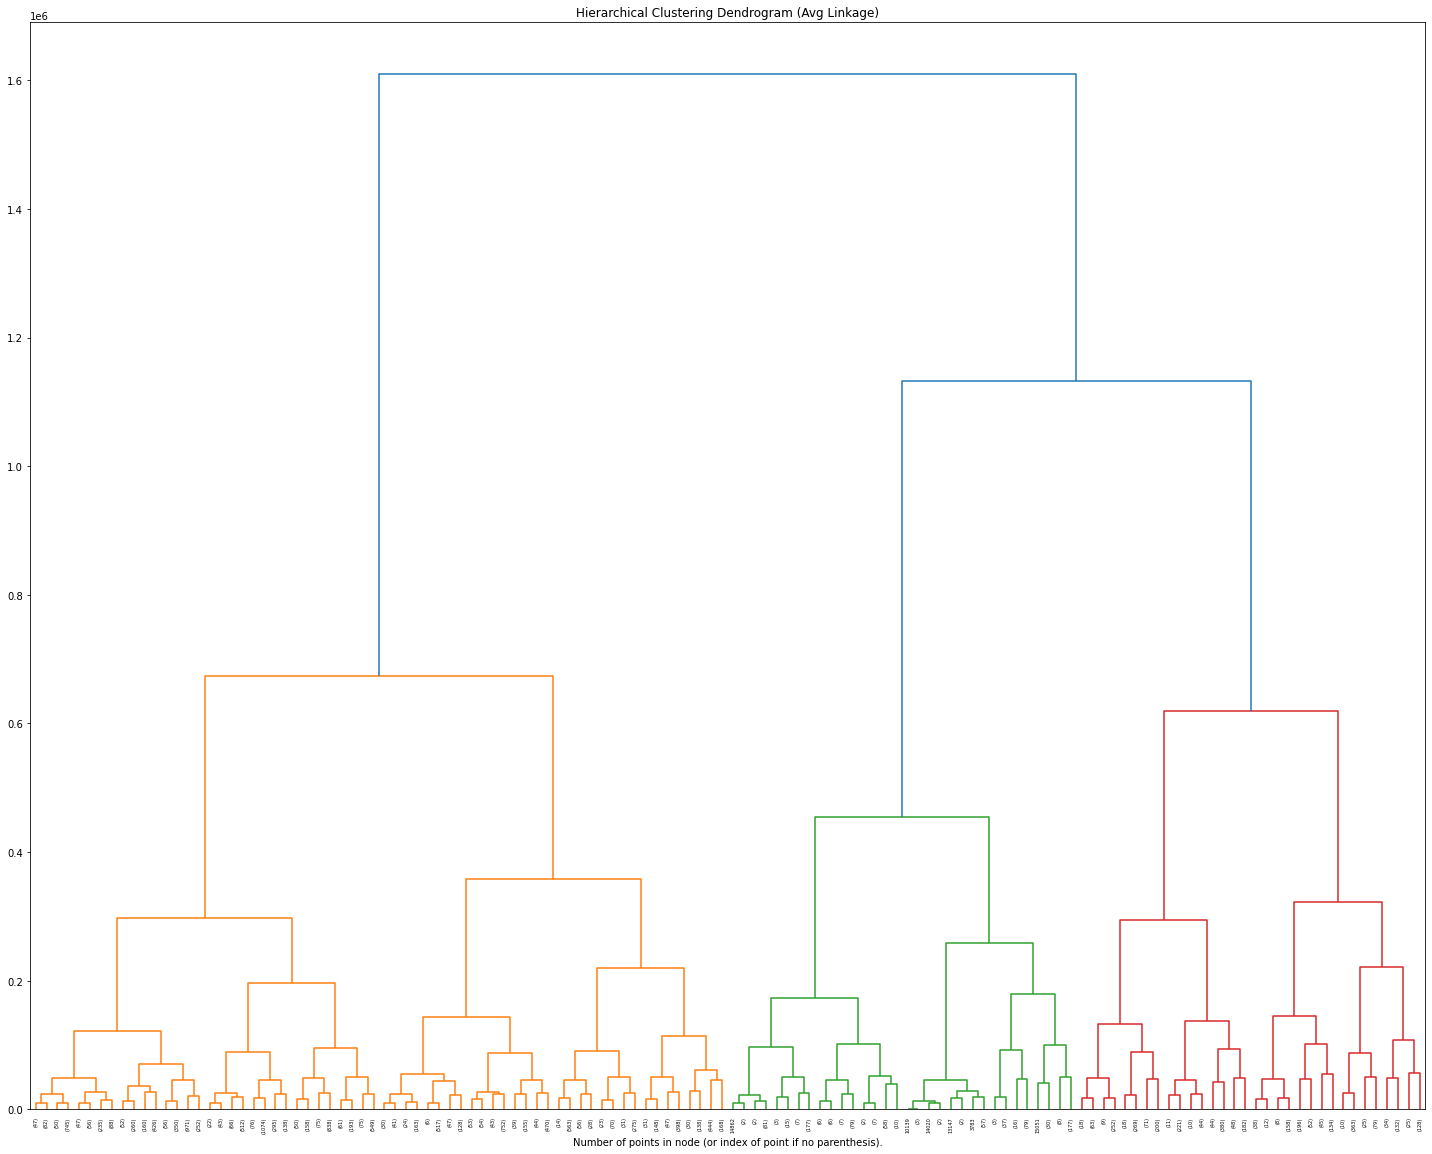

In [62]:

model = AgglomerativeClustering(n_clusters=17, compute_distances=True,linkage='average').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Avg Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

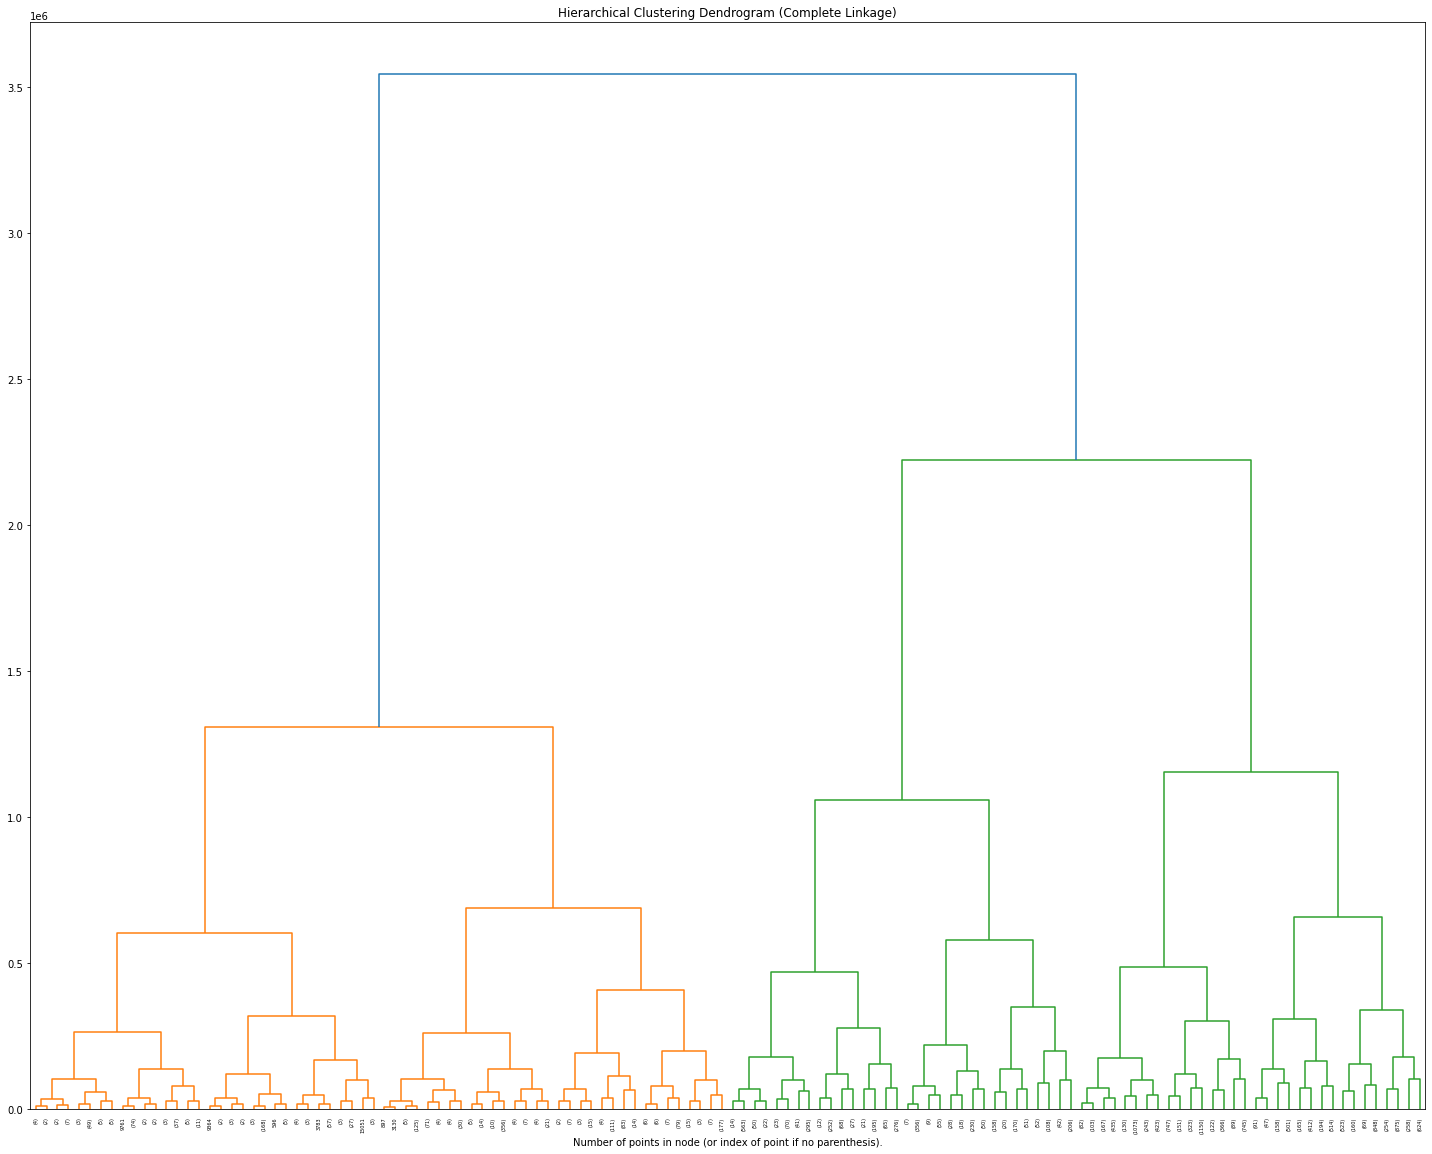

In [63]:

model = AgglomerativeClustering(n_clusters=17, compute_distances=True,linkage='complete').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

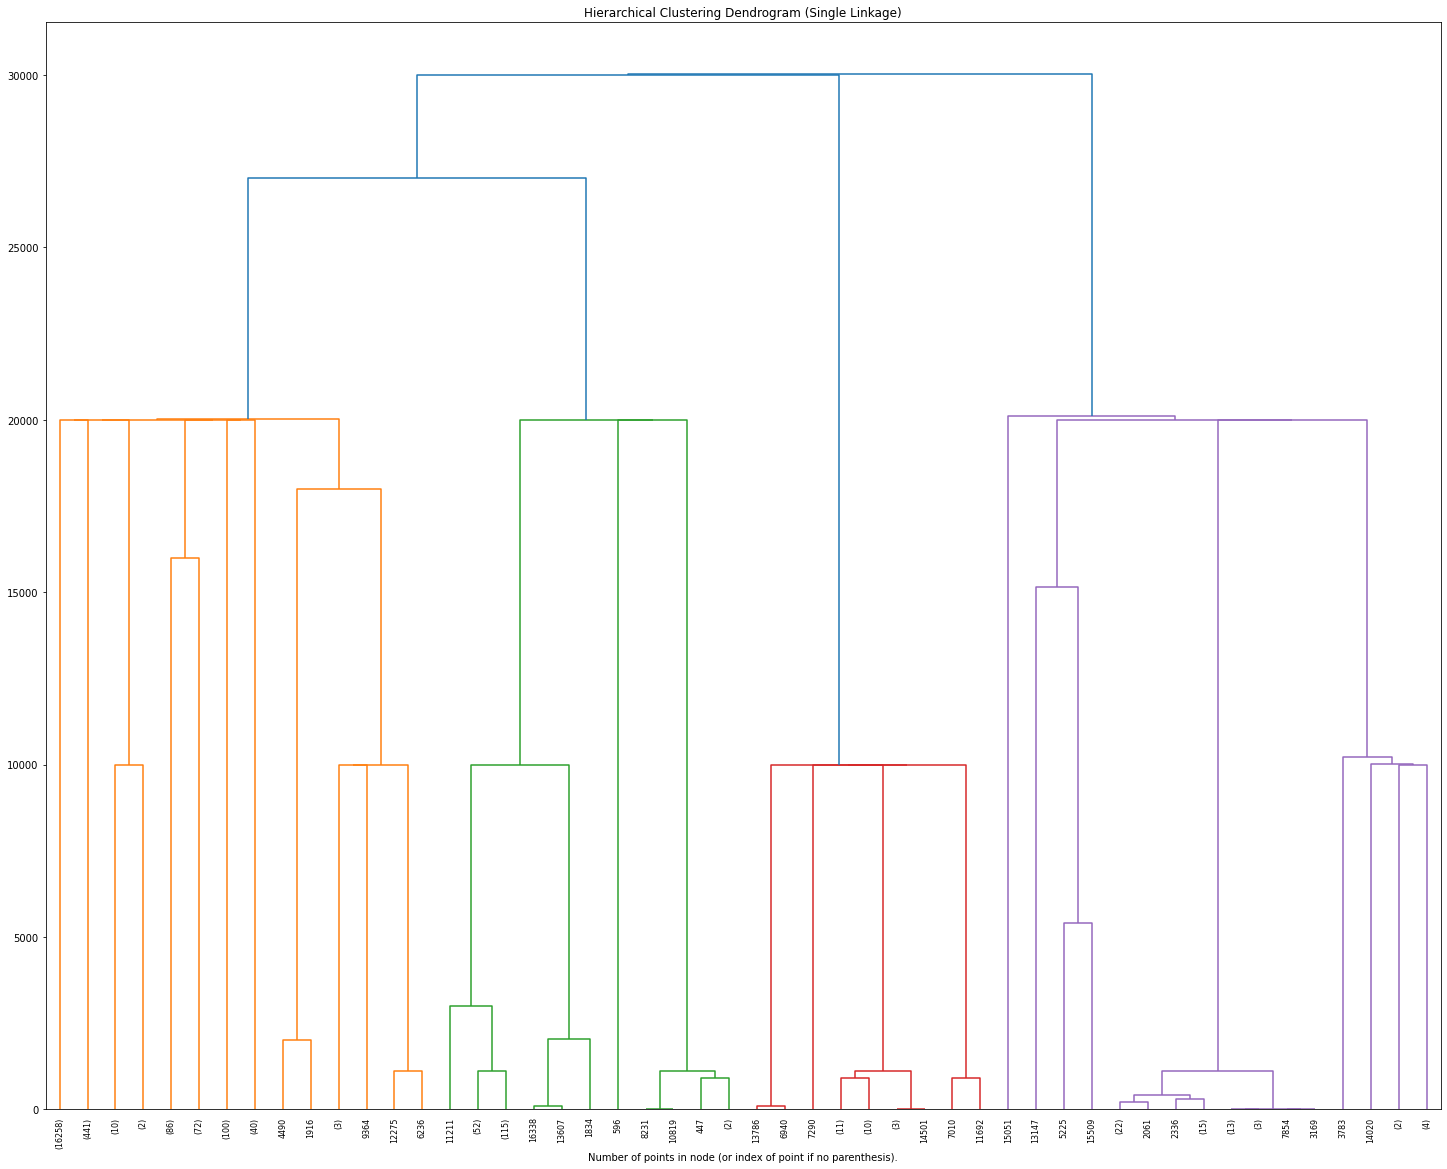

In [64]:

model = AgglomerativeClustering(n_clusters=5, compute_distances=True,linkage='single').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

<h2><b>Insights</b></h2>


<br><br>
<b> Number of clusters around 2 seems optimal in most cases, while in last plot(with single linkage) number of clusters around 16 is optimal</b>

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Insights/ Recommendations</p>
</div>    

<b>Insights</b>

<ul>
    <li> Top Paying job titles include 'Engineering Leadership',
 'Backend Engineer',
 'Product Manager',
 'Program Manager',
 'SDET',
 'QA Engineer',
 'Data Scientist',
 'Android Engineer' and
 'FullStack Engineer'.
  <li> Top paying companies include 'Cisco',
 'Intel Technology India Pvt Ltd',
 'Amazon',
 'Walmart Labs',
 'Symantec',
 'Schneider Electric India',
 'Morgan Stanley',
 'Ericsson RD Bangalore' and
 'Samsung Electronics'.
  <li>  Among top paying companies, salary for these is getting lesser in recent years, Goldmaan Sachs, Tata Consultancy Services, Samsung Electronics, VMware, Dell, Dbs Bank, Hsbc software devlopement India and GE
      <li> Among Top paying companies mean salary for these company is increasing every year, Amazon,Microsoft and Huawei Technologies
          <li> Avg CTC seems to be decreasing with year.

 </ul>

<b>Recommendations</b>

<ul>
<li> Freshers who want to work on technical side should look for roles related to Backend Engineer, SDET, QA engineer, Dataa Scientist, Android Engineer,Full stack engineer to get good salaries as expirience increases.
<li> Freshers who want best CTC should aim for companies like 'Cisco', 'Intel Technology India Pvt Ltd', 'Amazon', 'Walmart Labs', 'Symantec', 'Schneider Electric India', 'Morgan Stanley', 'Ericsson RD Bangalore' and 'Samsung Electronics'. 
</ul>
